# 0. Imports 
Importação das bibliotecas e carregamento dos dados

In [ ]:
import pandas  as pd 
import numpy   as np  
import seaborn as sns 


import matplotlib.pyplot as plt 
%matplotlib inline 

## 0.1 Funções

In [ ]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 25
    #display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
jupyter_settings() 


def EstacoesAno(date, regiao):
  year = date.year
  year = str(year)
  
  #hesmiferio norte
  if (regiao == 'North America' or regiao == 'Europe'):
    seasons = {'primavera': pd.date_range(start='20/03/'+year, end='21/06/'+year),
             'verão': pd.date_range(start='22/06/'+year, end='23/09/'+year),
             'outono': pd.date_range(start='24/09/'+year, end='22/12/'+year)} 

    if date in seasons['primavera']:
      return 'primavera'
    if date in seasons['verão']:
      return 'verão'
    if date in seasons['outono']:
      return 'outono'
    else:
      return 'inverno'
  else:
    #hemisferio sul 
    seasons = {'primavera': pd.date_range(start='22/09/'+year, end='20/12/'+year),
               'outono': pd.date_range(start='20/03/'+year, end='21/06/'+year), 
             'inverno': pd.date_range(start='21/06/'+year, end='21/09/'+year)}
    
    if date in seasons['primavera']:
      return 'primavera'
    if date in seasons['outono']:
      return 'outono'
    if date in seasons['inverno']:
      return 'inverno'  
    else:
      return 'verão'        


Populating the interactive namespace from numpy and matplotlib


## 0.2 Carregamento dos dados

In [ ]:
df_cupom = pd.read_csv('data/FatoDetalhes_DadosModelagem.csv', sep=';')

df_cupom.head(5)

,CupomID,ProdutoID,Quantidade,Valor,Desconto,Custo,ValorLiquido
0,10308,69,1,"2,12",0,"1,8317","0,2883"
1,10558,73,3,"2,97",0,"2,4057","0,5643"
2,10259,37,1,"4,37",0,"3,7757","0,5943"
3,11077,73,5,"6,11","0,0605","5,838","0,2725"
4,10752,69,3,"6,57",0,"5,3217","1,2483"


In [ ]:
df_vendas = pd.read_csv('data/FatoCabecalho_DadosModelagem.txt', delimiter = '\t')

df_vendas.sample(5)

,Data,ClienteID,FuncionarioID,ValorFrete,CupomID,EmpresaFrete,DataEntrega
776,01/08/2016,32,11,"75,84",10756,Freight Express,05/08/2016
490,13/11/2017,63,7,"55,53",10878,One Liners,14/11/2017
472,19/02/2017,79,7,"54,2",10744,One Liners,24/02/2017
259,24/11/2016,35,9,"38,27",10641,One Liners,09/12/2016
194,16/02/2018,59,5,"33,28",10353,Ship for U,19/02/2018


In [ ]:
df_clientes = pd.read_excel('data/Dimensoes_DadosModelagem.xlsx', sheet_name='Clientes')
df_funcionarios = pd.read_excel('data/Dimensoes_DadosModelagem.xlsx', sheet_name='Funcionarios')
df_escritorios = pd.read_excel('data/Dimensoes_DadosModelagem.xlsx', sheet_name='Escritorios')
df_categoria = pd.read_excel('data/Dimensoes_DadosModelagem.xlsx', sheet_name='Categoria')
df_produtos = pd.read_excel('data/Dimensoes_DadosModelagem.xlsx', sheet_name='Produtos')
df_fornecedores = pd.read_excel('data/Dimensoes_DadosModelagem.xlsx', sheet_name='Fornecedores')

## 0.3 Merge Data

In [ ]:
# Vendas - Clientes
df_merge = pd.merge(df_vendas, df_clientes, on='ClienteID', how='inner')

# Vendas - Funcionarios
df_merge = pd.merge(df_merge, df_funcionarios, on='FuncionarioID', how='inner')

# Produtos - Categoria 
df_produtos2 = pd.merge(df_produtos, df_categoria, on='CategoriaID', how='inner')
# Produtos - Fornecedor
df_produtos2 = pd.merge(df_produtos2, df_fornecedores, on='FornecedorID', how='inner')

# Cupom - Produto
df_cupom2 = pd.merge(df_cupom, df_produtos2, on='ProdutoID', how='inner')  

# Vendas - Cupom 
df_merge = pd.merge(df_merge, df_cupom2, on='CupomID', how='inner')

In [ ]:
# Remoção de algumas colunas 
df0 = df_merge.copy() 

#removendo colunas que não serão utilizadas
df0 = df0.drop(columns=['NomeContato','Endereco','PaisCodigo','Latitude','Longitude','Fax','Telefone','FornecedorContato'], axis=1)
df0.head()

,Data,ClienteID,FuncionarioID,ValorFrete,CupomID,EmpresaFrete,DataEntrega,Cliente,Cidade,Pais,Regiao,CEP,Extensao,NomeFuncionario,Genero,DataAdmissao,Escritorio,Supervisor,Cargo,SalarioAnual,MetaVendas,ProdutoID,Quantidade,Valor,Desconto,Custo,ValorLiquido,CategoriaID,Produto,FornecedorID,Categoria,Departamento,Descricao,Fornecedor,FornecedorPais
0,22/03/2018,78,11,"12,45",11081,Freight Express,05/04/2018,TTT-The Ticky Tie,Butte,USA,North America,59801.0,501.0,Rock Rollman,M,2012-10-01,5,Fletcher G. Mason,Sales Representative,135000,300000.0,75,150,"1163,25","105,75","943,7781","219,4719",1,Bow tie,12,Mens Clothes,Clothing,Fashion for Men,Austerlich,Germany
1,02/07/2017,80,11,"20,53",10982,Freight Express,04/07/2017,Don Balón,Mexico City,Mexico,North America,5033.0,501.0,Rock Rollman,M,2012-10-01,5,Fletcher G. Mason,Sales Representative,135000,300000.0,43,9,"102,33",0,"90,2551","12,0749",4,Summer Shorts,20,Bath Clothes,Clothing,Beachwear,Asin Fashion Ltd Co,Singapore
2,02/07/2017,80,11,"20,53",10982,Freight Express,04/07/2017,Don Balón,Mexico City,Mexico,North America,5033.0,501.0,Rock Rollman,M,2012-10-01,5,Fletcher G. Mason,Sales Representative,135000,300000.0,7,20,"746,4",0,"698,4566","47,9434",7,Conserve Shoes,3,Childrens wear,Clothing,3-15 Years,Dressed for Succes,USA
3,11/01/2015,80,11,"22,95",10276,Freight Express,19/01/2015,Don Balón,Mexico City,Mexico,North America,5033.0,501.0,Rock Rollman,M,2012-10-01,5,Fletcher G. Mason,Sales Representative,135000,300000.0,10,15,"103,8",0,"89,6832","14,1168",8,Sapporoo Gloves,4,Babywear,Clothing,0-3 Years,Nitsuchiba,Japan
4,11/01/2015,80,11,"22,95",10276,Freight Express,19/01/2015,Don Balón,Mexico City,Mexico,North America,5033.0,501.0,Rock Rollman,M,2012-10-01,5,Fletcher G. Mason,Sales Representative,135000,300000.0,13,10,"274,5",0,"237,168","37,332",8,Aino Shoes,6,Babywear,Clothing,0-3 Years,SatSUMAs,Japan


# 1. Descrição dos Dados

In [ ]:
df1 = df0.copy()
df1.shape

(2172, 35)

### 1.1 Tipos de Dados

In [ ]:
df1.dtypes 

Data                       object
ClienteID                   int64
FuncionarioID               int64
ValorFrete                 object
CupomID                     int64
EmpresaFrete               object
DataEntrega                object
Cliente                    object
Cidade                     object
Pais                       object
Regiao                     object
CEP                       float64
Extensao                  float64
NomeFuncionario            object
Genero                     object
DataAdmissao       datetime64[ns]
Escritorio                  int64
Supervisor                 object
Cargo                      object
SalarioAnual                int64
MetaVendas                float64
ProdutoID                   int64
Quantidade                  int64
Valor                      object
Desconto                   object
Custo                      object
ValorLiquido               object
CategoriaID                 int64
Produto                    object
FornecedorID  

### 1.2 Nulos
Apenas a coluna CEP possui valores nulos, o que não será um empecilho. 

In [ ]:
df1.isna().sum()

Data                 0
ClienteID            0
FuncionarioID        0
ValorFrete           0
CupomID              0
EmpresaFrete         0
DataEntrega          0
Cliente              0
Cidade               0
Pais                 0
Regiao               0
CEP                518
Extensao             0
NomeFuncionario      0
Genero               0
DataAdmissao         0
Escritorio           0
Supervisor           0
Cargo                0
SalarioAnual         0
MetaVendas           0
ProdutoID            0
Quantidade           0
Valor                0
Desconto             0
Custo                0
ValorLiquido         0
CategoriaID          0
Produto              0
FornecedorID         0
Categoria            0
Departamento         0
Descricao            0
Fornecedor           0
FornecedorPais       0
dtype: int64

### 1.3 Alteração dos tipos

In [ ]:
#Alterando os campos data 

from datetime import datetime

df1['Data'] = df1.apply( lambda x: datetime.strptime(x['Data'], "%d/%m/%Y"), axis=1 )

df1['DataEntrega'] = df1.apply( lambda x: datetime.strptime(x['DataEntrega'], "%d/%m/%Y"), axis=1 )

df1['DataAdmissao'] = df1.apply( lambda x: datetime.strftime(x['DataAdmissao'], "%d/%m/%Y"), axis=1 )
df1['DataAdmissao'] = df1.apply( lambda x: datetime.strptime(x['DataAdmissao'], "%d/%m/%Y"), axis=1 )

In [ ]:
# Tratando os campos de valores
df1['ValorFrete'] = df1['ValorFrete'].apply( lambda x: x.replace(',', '.')).astype(np.float64)
df1['Valor'] = df1['Valor'].apply( lambda x: x.replace(',', '.')).astype(np.float64)
df1['Desconto'] = df1['Desconto'].apply( lambda x: x.replace(',', '.')).astype(np.float64)
df1['Custo'] = df1['Custo'].apply( lambda x: x.replace(',', '.')).astype(np.float64)
df1['ValorLiquido'] = df1['ValorLiquido'].apply( lambda x: x.replace(',', '.')).astype(np.float64)

### 1.4 Outliers 
Outliers normais

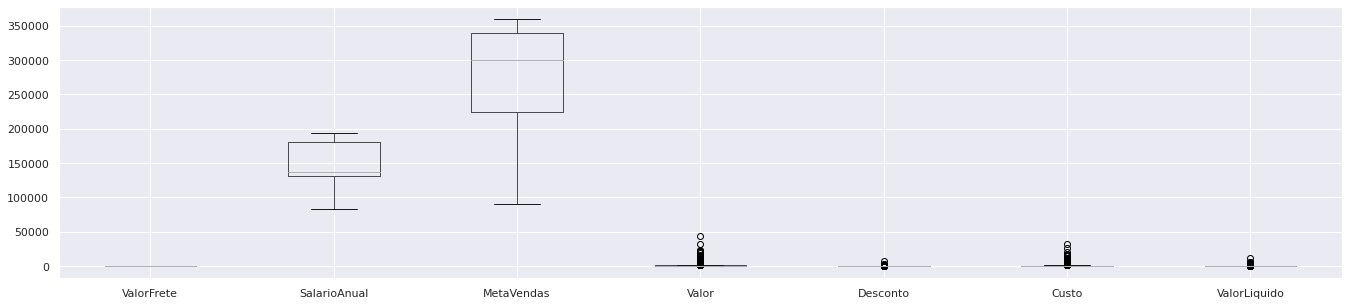

In [ ]:
df1[['ValorFrete','SalarioAnual','MetaVendas','Valor','Desconto','Custo','ValorLiquido']].boxplot(figsize = (23, 5)); 

## 1.5 Estatística Descritiva 

In [ ]:
# Atributos para a Estatística Descritiva
n_attributes = df1[['ValorFrete','SalarioAnual','MetaVendas','Valor','Desconto','Custo','ValorLiquido']]

### 1.5.1 Atributos numéricos 

In [ ]:
#Central Tendence (Tendencia Central) 
ct1 = pd.DataFrame(n_attributes.apply(np.mean)).T 
ct2 = pd.DataFrame(n_attributes.apply(np.median)).T

# Dispersão = std, min, max, range, skew, kurtosis 
d1 = pd.DataFrame(n_attributes.apply(np.std)).T
d2 = pd.DataFrame(n_attributes.apply(min)).T
d3 = pd.DataFrame(n_attributes.apply(max)).T
d4 = pd.DataFrame(n_attributes.apply(lambda x: x.max() - x.min())).T 
d5 = pd.DataFrame(n_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(n_attributes.apply(lambda x: x.kurtosis())).T 

# Concatenar os datraframes 
m = pd.concat([d1, d2, d3, d4, d5, d6,ct1,ct2]).T.reset_index()
m.columns = ['attributes','std','min','max','range','skew','kurtosis','mean','median'] 
m

,attributes,std,min,max,range,skew,kurtosis,mean,median
0,ValorFrete,17.347574,12.4500,79.9600,67.5100,-0.013787,-1.254921,50.420506,50.46000
1,SalarioAnual,33582.253890,83000.0000,193000.0000,110000.0000,-0.131829,-1.035450,147254.281768,137000.00000
2,MetaVendas,96161.177577,90000.0000,360000.0000,270000.0000,-0.822013,-0.836064,262472.375691,300000.00000
3,Valor,2002.067318,2.1200,43755.1200,43753.0000,10.274130,155.169948,820.970622,355.07000
4,Desconto,226.812730,0.0000,7292.5201,7292.5201,18.541338,508.779984,49.608513,0.00000
5,Custo,1576.968190,1.8317,32160.0132,32158.1815,9.887805,139.296017,653.911917,282.27510
6,ValorLiquido,455.449430,0.2725,11595.1069,11594.8344,12.287046,230.669578,167.058479,63.57665


Analisando a variável ValorLiquido, skew muito alta, deslocada pra esquerda o que significa que tem alta concentração de valores no começo

# 2. Feature Engineering

In [ ]:
df2 = df1.copy()

In [ ]:
# Serão derivadas as variáveis de data para extração de dia, mês, ano 
df2['diaVenda'] = df2['Data'].dt.day 
df2['mesVenda'] = df2['Data'].dt.month 
df2['anoVenda'] = df2['Data'].dt.year 

#mapa para os dias da semana
diaSemanaVenda_map = {0: 'Monday' , 1: 'Tuesday' , 2: 'Wednesday' , 3: 'Thursday' , 4: 'Friday' , 5: 'Saturday' , 6: 'Sunday'}
df2['diaSemanaVenda'] = df2['Data'].dt.weekday.map(diaSemanaVenda_map) 

# Criando variável para mensurar o tempo até o produto chegar no cliente 
df2['prazoEntrega'] = (df2['DataEntrega'] - df2['Data']).dt.days 

# Variável val. total do produto (sem frete)
df2['totalProduto'] = ( (df2['ValorLiquido'] * df2['Quantidade']) - df2['Desconto'] ) 

#estações do ano 
df2['estacao'] = df2.apply( lambda x: EstacoesAno(x['Data'], x['Regiao'][0]) , axis=1)

# 3. Análise Exploratória de Dados 

Nesta e na próxima seção será utilizado o pacote pct_change.

**pct_change:** 
- Mudança percentual entre o elemento atual e um anterior.

- Calcula a variação percentual da linha imediatamente anterior por padrão. Isso é útil para comparar a porcentagem de mudança em uma série de elementos de tempo.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html

In [ ]:
df3 = df2.copy()
df3.head()

,Data,ClienteID,FuncionarioID,ValorFrete,CupomID,EmpresaFrete,DataEntrega,Cliente,Cidade,Pais,Regiao,CEP,Extensao,NomeFuncionario,Genero,DataAdmissao,Escritorio,Supervisor,Cargo,SalarioAnual,MetaVendas,ProdutoID,Quantidade,Valor,Desconto,Custo,ValorLiquido,CategoriaID,Produto,FornecedorID,Categoria,Departamento,Descricao,Fornecedor,FornecedorPais,diaVenda,mesVenda,anoVenda,diaSemanaVenda,prazoEntrega,totalProduto,estacao
0,2018-03-22,78,11,12.45,11081,Freight Express,2018-04-05,TTT-The Ticky Tie,Butte,USA,North America,59801.0,501.0,Rock Rollman,M,2012-10-01,5,Fletcher G. Mason,Sales Representative,135000,300000.0,75,150,1163.25,105.75,943.7781,219.4719,1,Bow tie,12,Mens Clothes,Clothing,Fashion for Men,Austerlich,Germany,22,3,2018,Thursday,14,32815.0350,outono
1,2017-07-02,80,11,20.53,10982,Freight Express,2017-07-04,Don Balón,Mexico City,Mexico,North America,5033.0,501.0,Rock Rollman,M,2012-10-01,5,Fletcher G. Mason,Sales Representative,135000,300000.0,43,9,102.33,0.00,90.2551,12.0749,4,Summer Shorts,20,Bath Clothes,Clothing,Beachwear,Asin Fashion Ltd Co,Singapore,2,7,2017,Sunday,2,108.6741,inverno
2,2017-07-02,80,11,20.53,10982,Freight Express,2017-07-04,Don Balón,Mexico City,Mexico,North America,5033.0,501.0,Rock Rollman,M,2012-10-01,5,Fletcher G. Mason,Sales Representative,135000,300000.0,7,20,746.40,0.00,698.4566,47.9434,7,Conserve Shoes,3,Childrens wear,Clothing,3-15 Years,Dressed for Succes,USA,2,7,2017,Sunday,2,958.8680,inverno
3,2015-01-11,80,11,22.95,10276,Freight Express,2015-01-19,Don Balón,Mexico City,Mexico,North America,5033.0,501.0,Rock Rollman,M,2012-10-01,5,Fletcher G. Mason,Sales Representative,135000,300000.0,10,15,103.80,0.00,89.6832,14.1168,8,Sapporoo Gloves,4,Babywear,Clothing,0-3 Years,Nitsuchiba,Japan,11,1,2015,Sunday,8,211.7520,verão
4,2015-01-11,80,11,22.95,10276,Freight Express,2015-01-19,Don Balón,Mexico City,Mexico,North America,5033.0,501.0,Rock Rollman,M,2012-10-01,5,Fletcher G. Mason,Sales Representative,135000,300000.0,13,10,274.50,0.00,237.1680,37.3320,8,Aino Shoes,6,Babywear,Clothing,0-3 Years,SatSUMAs,Japan,11,1,2015,Sunday,8,373.3200,verão


## 3.1 Análise Univariada

### 3.1.1 Variáveis numéricas

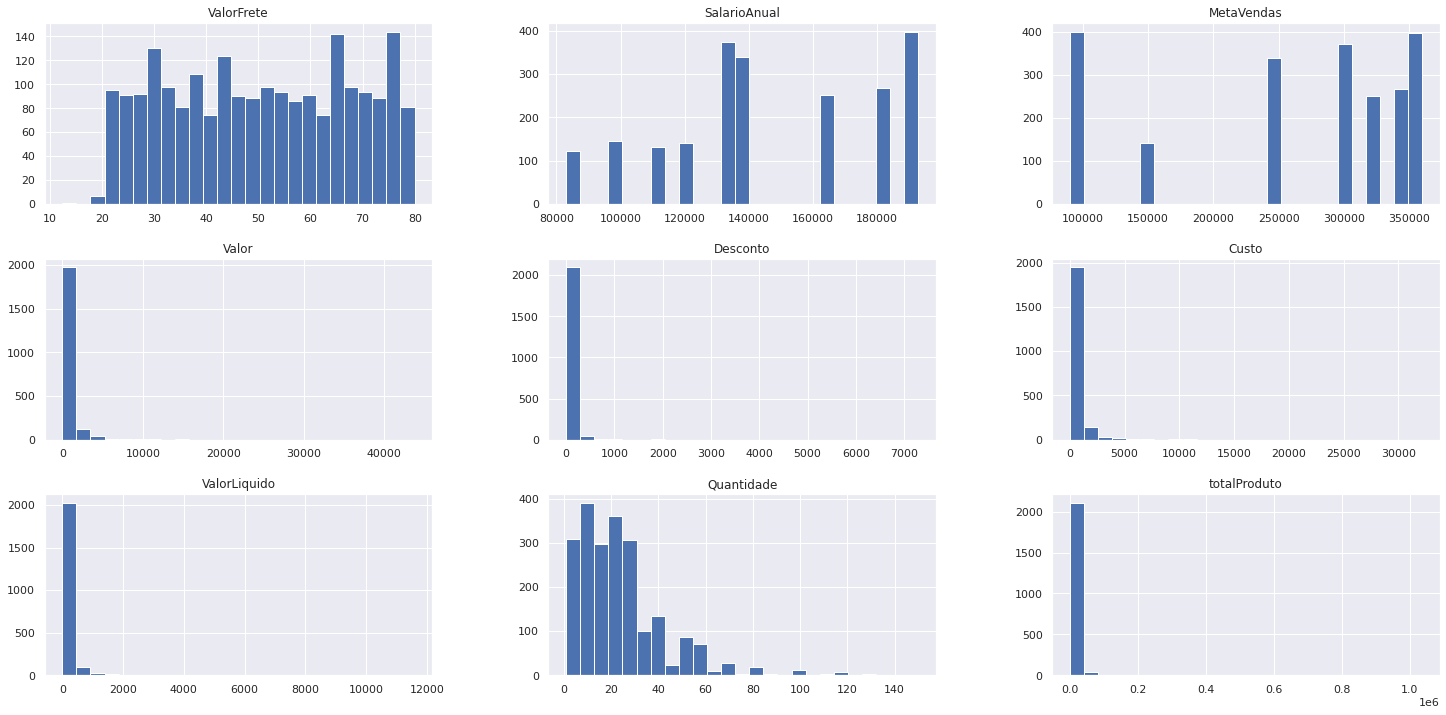

In [ ]:
# Histograma das variáveis numéricas
n_attributes = n_attributes = df3[['ValorFrete','SalarioAnual','MetaVendas','Valor','Desconto','Custo','ValorLiquido','Quantidade','totalProduto']]
n_attributes.hist(bins=25);

### 3.1.2 Variáveis Categóricas

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


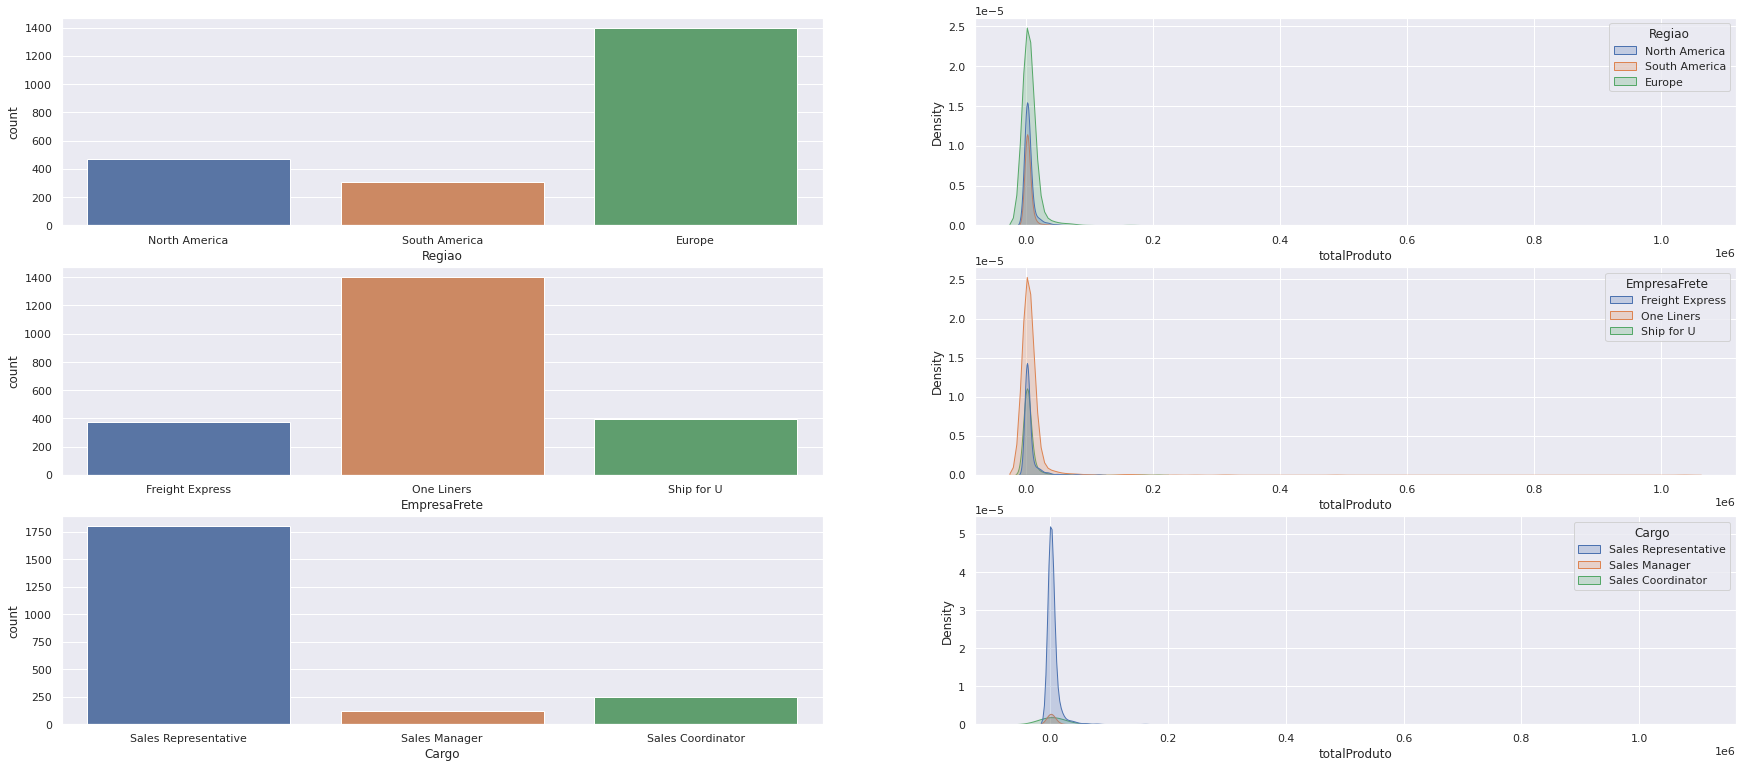

In [ ]:
# tamanho da imagem
f = plt.figure(figsize=(30,13))

plt.subplot(3,2,1)
sns.countplot(df3['Regiao']); 

plt.subplot(3,2,2)
g = sns.kdeplot(data=df3, x='totalProduto', hue='Regiao', shade=True, palette='deep'); 

plt.subplot(3,2,3)
sns.countplot(df3['EmpresaFrete']); 

plt.subplot(3,2,4)
g = sns.kdeplot(data=df3, x='totalProduto', hue='EmpresaFrete', shade=True, palette='deep');


plt.subplot(3,2,5)
sns.countplot(df3['Cargo']); 

plt.subplot(3,2,6)
g = sns.kdeplot(data=df3, x='totalProduto', hue='Cargo', shade=True, palette='deep');

## 3.2 Análise Bivariada (Novos Insights)

### **A média de vendas na Europa é 25% maior.**
**O gráfico mostra que a média de venda na América do Norte comparada com a Europa é 25% menor. Então essa hipotése é VERDADEIRA** 



posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


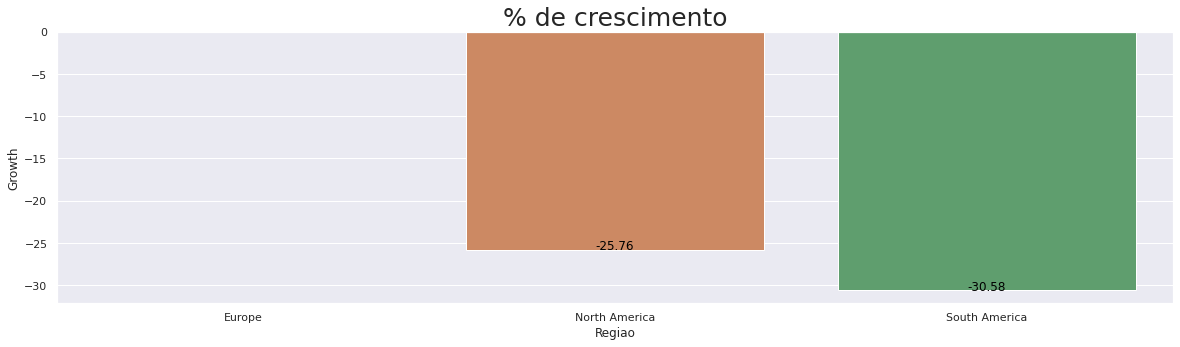

In [ ]:
# Agrupando por regiao
df3_group = df3[['CupomID','Regiao','ValorFrete','totalProduto']].groupby(['CupomID','Regiao','ValorFrete']).sum().reset_index()
#Somando o frete
df3_group['totalProduto'] = (df3_group['totalProduto'] + df3_group['ValorFrete']).astype('float64')

#Agrupa o total por região
aux1 = df3_group[['Regiao','totalProduto']].groupby('Regiao').mean().reset_index()
# % de crescimento 
aux1['growth'] = 100 * aux1['totalProduto'].pct_change()

#tamanho
f = plt.figure(figsize=(20,5))

#Gráfico de barras 
g = sns.barplot(x='Regiao', y='growth', data=aux1);
plt.title("% de crescimento",fontsize=25);
g.set_xlabel('Regiao');
g.set_ylabel('Growth');

for index, row in aux1.iterrows():
    g.text(row.name,row.growth, round(row.growth,2), color='black', ha="center")

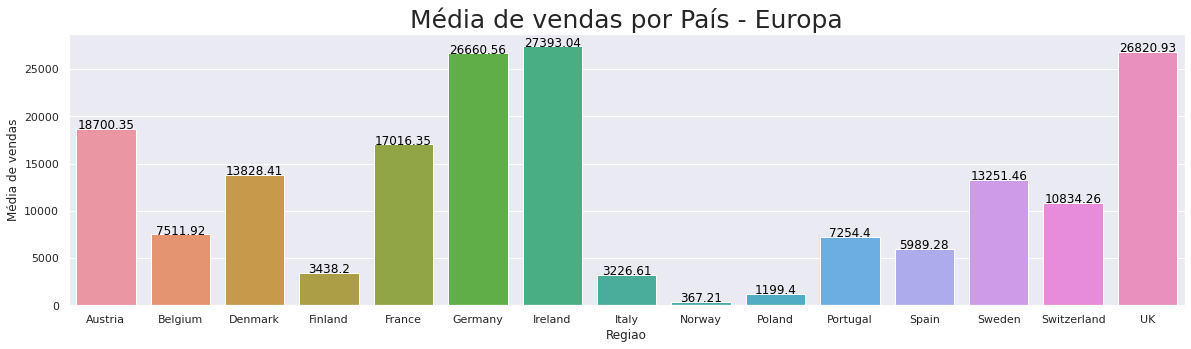

In [ ]:
# Agrupando por região
df3_group = df3[['CupomID','Pais','Regiao','ValorFrete','totalProduto']].groupby(['CupomID','Pais','Regiao','ValorFrete']).sum().reset_index()
#Somando o frete
df3_group['totalProduto'] = (df3_group['totalProduto'] + df3_group['ValorFrete']).astype('float64')

#Agrupa o total por região
df3_group = df3_group[df3_group['Regiao']=='Europe']
aux1 = df3_group[['Pais','totalProduto']].groupby('Pais').mean().reset_index()

#tamanho
f = plt.figure(figsize=(20,5))

#Gráfico de barras 
g = sns.barplot(x='Pais', y='totalProduto', data=aux1);
plt.title("Média de vendas por País - Europa",fontsize=25);
g.set_xlabel('Regiao');
g.set_ylabel('Média de vendas');

for index, row in aux1.iterrows():
    g.text(row.name,row.totalProduto, round(row.totalProduto,2), color='black', ha="center")

### **A média de vendas na américa do Sul é 20% maior no Brasil.**
**Falsa: Como mostra o gráfico, a média de vendas no Brasil é 770% maior.** 


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


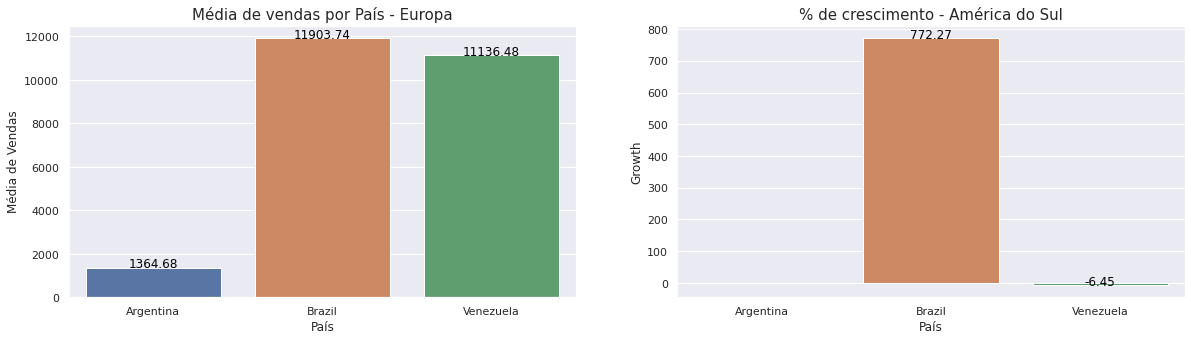

In [ ]:
# Agrupando por Pais e Regiao
df3_group = df3[['CupomID','Pais','Regiao','ValorFrete','totalProduto']].groupby(['CupomID','Pais','Regiao','ValorFrete']).sum().reset_index()
#Somando o frete
df3_group['totalProduto'] = (df3_group['totalProduto'] + df3_group['ValorFrete']).astype('float64')

#Agrupa o total por Pais
df3_group = df3_group[df3_group['Regiao']=='South America']
aux1 = df3_group[['Pais','totalProduto']].groupby('Pais').mean().reset_index()

# % de crescimento
aux1['growth'] = 100 * aux1['totalProduto'].pct_change()

#tamanho
f = plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
#Gráfico de barras 
g = sns.barplot(x='Pais', y='totalProduto', data=aux1);
plt.title("Média de vendas por País - Europa",fontsize=15);
g.set_xlabel('País');
g.set_ylabel('Média de Vendas');

for index, row in aux1.iterrows():
    g.text(row.name,row.totalProduto, round(row.totalProduto,2), color='black', ha="center")

plt.subplot(1,2,2)
g = sns.barplot(x='Pais', y='growth', data=aux1);
plt.title("% de crescimento - América do Sul",fontsize=15);
g.set_xlabel('País');
g.set_ylabel('Growth');

for index, row in aux1.iterrows():
    g.text(row.name,row.growth, round(row.growth,2), color='black', ha="center")

### **Funcionários do escritorio 3 vendem 15% a mais, na média.**
**Falsa: O escritório 3 possui a menor média de vendas** 


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


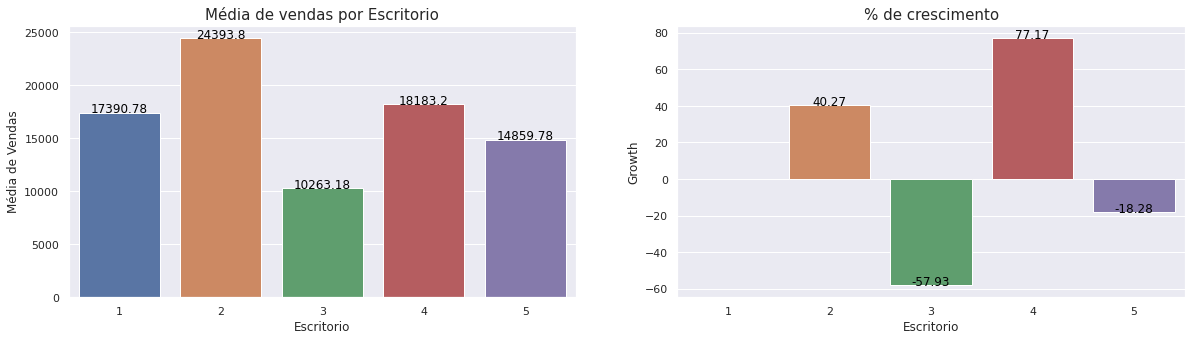

In [ ]:
# Agrupando por Escritorio
df3_group = df3[['CupomID','Escritorio','ValorFrete','totalProduto']].groupby(['CupomID','Escritorio','ValorFrete']).sum().reset_index()
#Somando o frete
df3_group['totalProduto'] = (df3_group['totalProduto'] + df3_group['ValorFrete']).astype('float64')

#Agrupa o total por escritorio
aux1 = df3_group[['Escritorio','totalProduto']].groupby('Escritorio').mean().reset_index()

# % de crescimento
aux1['growth'] = 100 * aux1['totalProduto'].pct_change()

#tamanho
f = plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
#Gráfico de barras 
g = sns.barplot(x='Escritorio', y='totalProduto', data=aux1);
plt.title("Média de vendas por Escritorio",fontsize=15);
g.set_xlabel('Escritorio');
g.set_ylabel('Média de Vendas');

for index, row in aux1.iterrows():
    g.text(row.name,row.totalProduto, round(row.totalProduto,2), color='black', ha="center")

plt.subplot(1,2,2)
g = sns.barplot(x='Escritorio', y='growth', data=aux1);
plt.title("% de crescimento",fontsize=15);
g.set_xlabel('Escritorio');
g.set_ylabel('Growth');

for index, row in aux1.iterrows():
    g.text(row.name,row.growth, round(row.growth,2), color='black', ha="center")

### **A média de vendas aumenta 10% a medida que a meta aumenta.**
**Falsa: não existe crescimento linear nesse caso, pelo contrário, a maior média de vendas está concentrada em vendedores com meta de 320.000** 


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


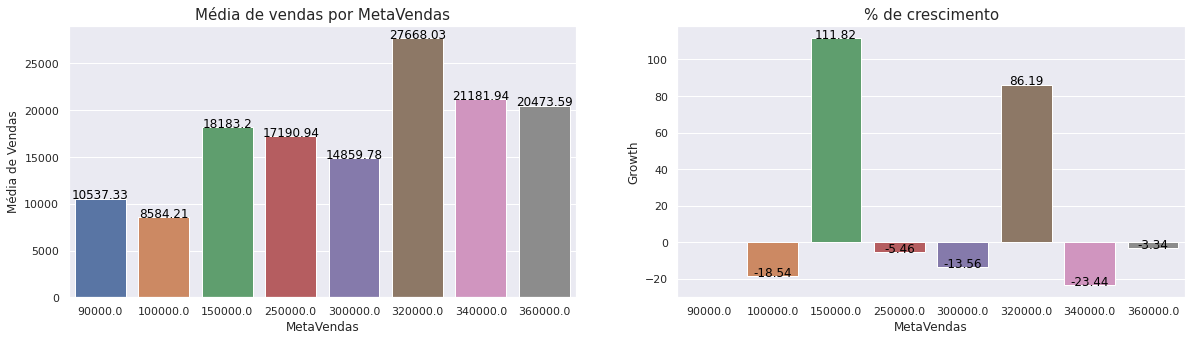

In [ ]:
# Agrupando por cupom e MetaVendas
df3_group = df3[['CupomID','MetaVendas','ValorFrete','totalProduto']].groupby(['CupomID','MetaVendas','ValorFrete']).sum().reset_index()
#Somando o frete
df3_group['totalProduto'] = (df3_group['totalProduto'] + df3_group['ValorFrete']).astype('float64')

#Agrupa o total por MetaVendas
aux1 = df3_group[['MetaVendas','totalProduto']].groupby('MetaVendas').mean().reset_index()

# % de crescimento
aux1['growth'] = 100 * aux1['totalProduto'].pct_change() 

#tamanho
f = plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
#Gráfico de barras 
g = sns.barplot(x='MetaVendas', y='totalProduto', data=aux1);
plt.title("Média de vendas por MetaVendas",fontsize=15);
g.set_xlabel('MetaVendas');
g.set_ylabel('Média de Vendas');

for index, row in aux1.iterrows():
    g.text(row.name,row.totalProduto, round(row.totalProduto,2), color='black', ha="center")

plt.subplot(1,2,2)
g = sns.barplot(x='MetaVendas', y='growth', data=aux1);
plt.title("% de crescimento",fontsize=15);
g.set_xlabel('MetaVendas');
g.set_ylabel('Growth');

for index, row in aux1.iterrows():
    g.text(row.name,row.growth, round(row.growth,2), color='black', ha="center")

### **A média de vendas da categoria Sportwear é 30% maior.**
**Falsa: as categorias que se destacam no quesito de média de vendas são: Childrens wear, Mens Footwear, Womens wear.** 


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


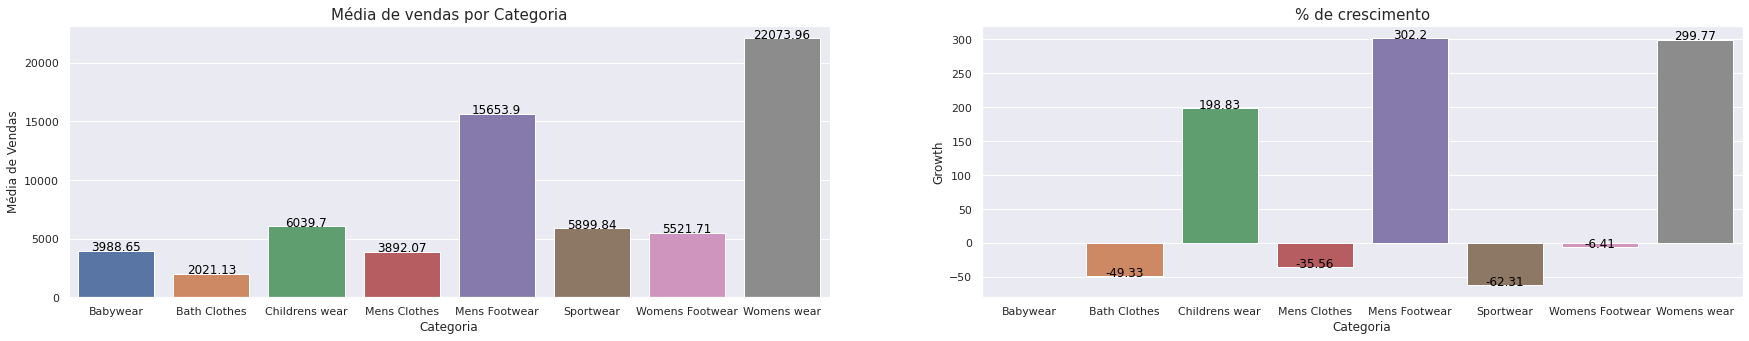

In [ ]:
# Agrupando por cupom e Categoria
df3_group = df3[['CupomID','Categoria','ValorFrete','totalProduto']].groupby(['CupomID','Categoria','ValorFrete']).sum().reset_index()
#Somando o frete
df3_group['totalProduto'] = (df3_group['totalProduto'] + df3_group['ValorFrete']).astype('float64')

#Agrupa o total por Categoria
aux1 = df3_group[['Categoria','totalProduto']].groupby('Categoria').mean().reset_index()

# % de crescimento
aux1['growth'] = 100 * aux1['totalProduto'].pct_change() 

#tamanho
f = plt.figure(figsize=(30,5))

plt.subplot(1,2,1)
#Gráfico de barras 
g = sns.barplot(x='Categoria', y='totalProduto', data=aux1);
plt.title("Média de vendas por Categoria",fontsize=15);
g.set_xlabel('Categoria');
g.set_ylabel('Média de Vendas');

for index, row in aux1.iterrows():
    g.text(row.name,row.totalProduto, round(row.totalProduto,2), color='black', ha="center")

plt.subplot(1,2,2)
g = sns.barplot(x='Categoria', y='growth', data=aux1);
plt.title("% de crescimento",fontsize=15);
g.set_xlabel('Categoria');
g.set_ylabel('Growth');

for index, row in aux1.iterrows():
    g.text(row.name,row.growth, round(row.growth,2), color='black', ha="center")

In [ ]:
aux1 

,Categoria,totalProduto,growth
0,Babywear,3988.647477,NaN
1,Bath Clothes,2021.125379,-49.328052
2,Childrens wear,6039.702224,198.828677
3,Mens Clothes,3892.069237,-35.558591
4,Mens Footwear,15653.897269,302.199866
5,Sportwear,5899.836654,-62.310749
6,Womens Footwear,5521.714571,-6.409026
7,Womens wear,22073.956255,299.766340


### **A média de vendas de produtos dos fornecedores do Reino Unido é 10% maior.**
**Falsa: a média de vendas de produtos dos fornecedores de UK é uma das menores .** 

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


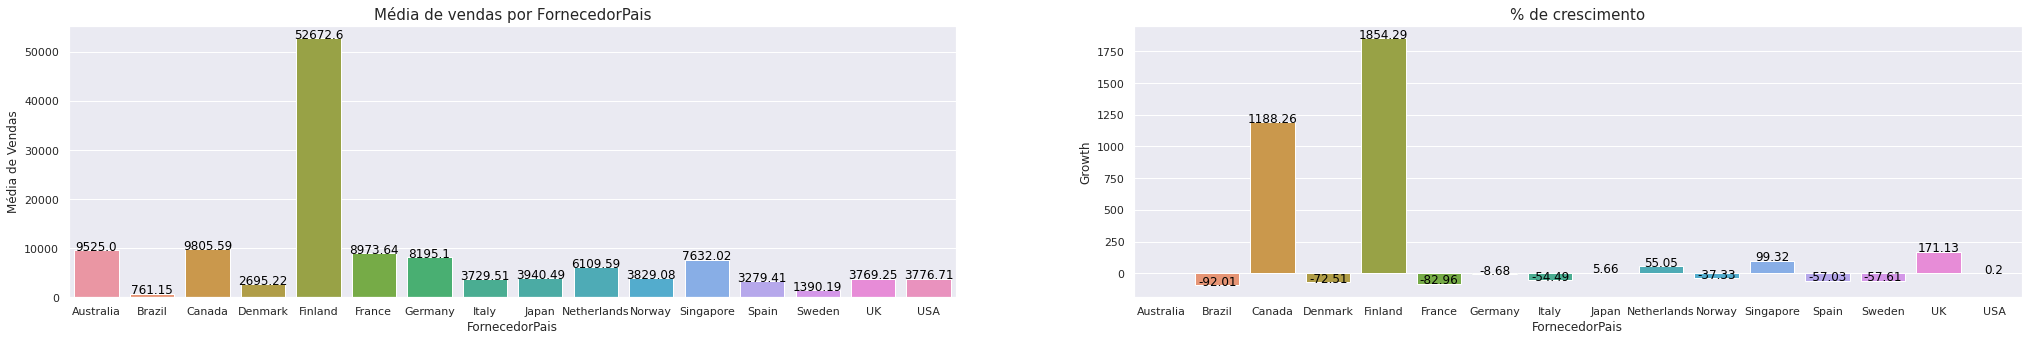

In [ ]:
# Agrupando por cupom e FornecedorPais
df3_group = df3[['CupomID','FornecedorPais','ValorFrete','totalProduto']].groupby(['CupomID','FornecedorPais','ValorFrete']).sum().reset_index()
#Somando o frete
df3_group['totalProduto'] = (df3_group['totalProduto'] + df3_group['ValorFrete']).astype('float64')

#Agrupa o total por FornecedorPais
aux1 = df3_group[['FornecedorPais','totalProduto']].groupby('FornecedorPais').mean().reset_index()

# % de crescimento
aux1['growth'] = 100 * aux1['totalProduto'].pct_change() 

#tamanho
f = plt.figure(figsize=(35,5))

plt.subplot(1,2,1)
#Gráfico de barras 
g = sns.barplot(x='FornecedorPais', y='totalProduto', data=aux1);
plt.title("Média de vendas por FornecedorPais",fontsize=15);
g.set_xlabel('FornecedorPais');
g.set_ylabel('Média de Vendas');

for index, row in aux1.iterrows():
    g.text(row.name,row.totalProduto, round(row.totalProduto,2), color='black', ha="center")

plt.subplot(1,2,2)
g = sns.barplot(x='FornecedorPais', y='growth', data=aux1);
plt.title("% de crescimento",fontsize=15);
g.set_xlabel('FornecedorPais');
g.set_ylabel('Growth');

for index, row in aux1.iterrows():
    g.text(row.name,row.growth, round(row.growth,2), color='black', ha="center")

### **A média de vendas do ano 2016 aumentou 20%.**
**Falsa: na verdade a média para esse ano aumento 31% comparado ao ano 2015 .** 

Obs.: No primeiro gráfico, o mês de Julho nos anos 2016 e 2017 tiveram um pico de média de vendas. Ao invetisgar não encontrei nenhum fenômeno, apenas grandes quantidades de produtos vendidos para determinados clientes. 

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


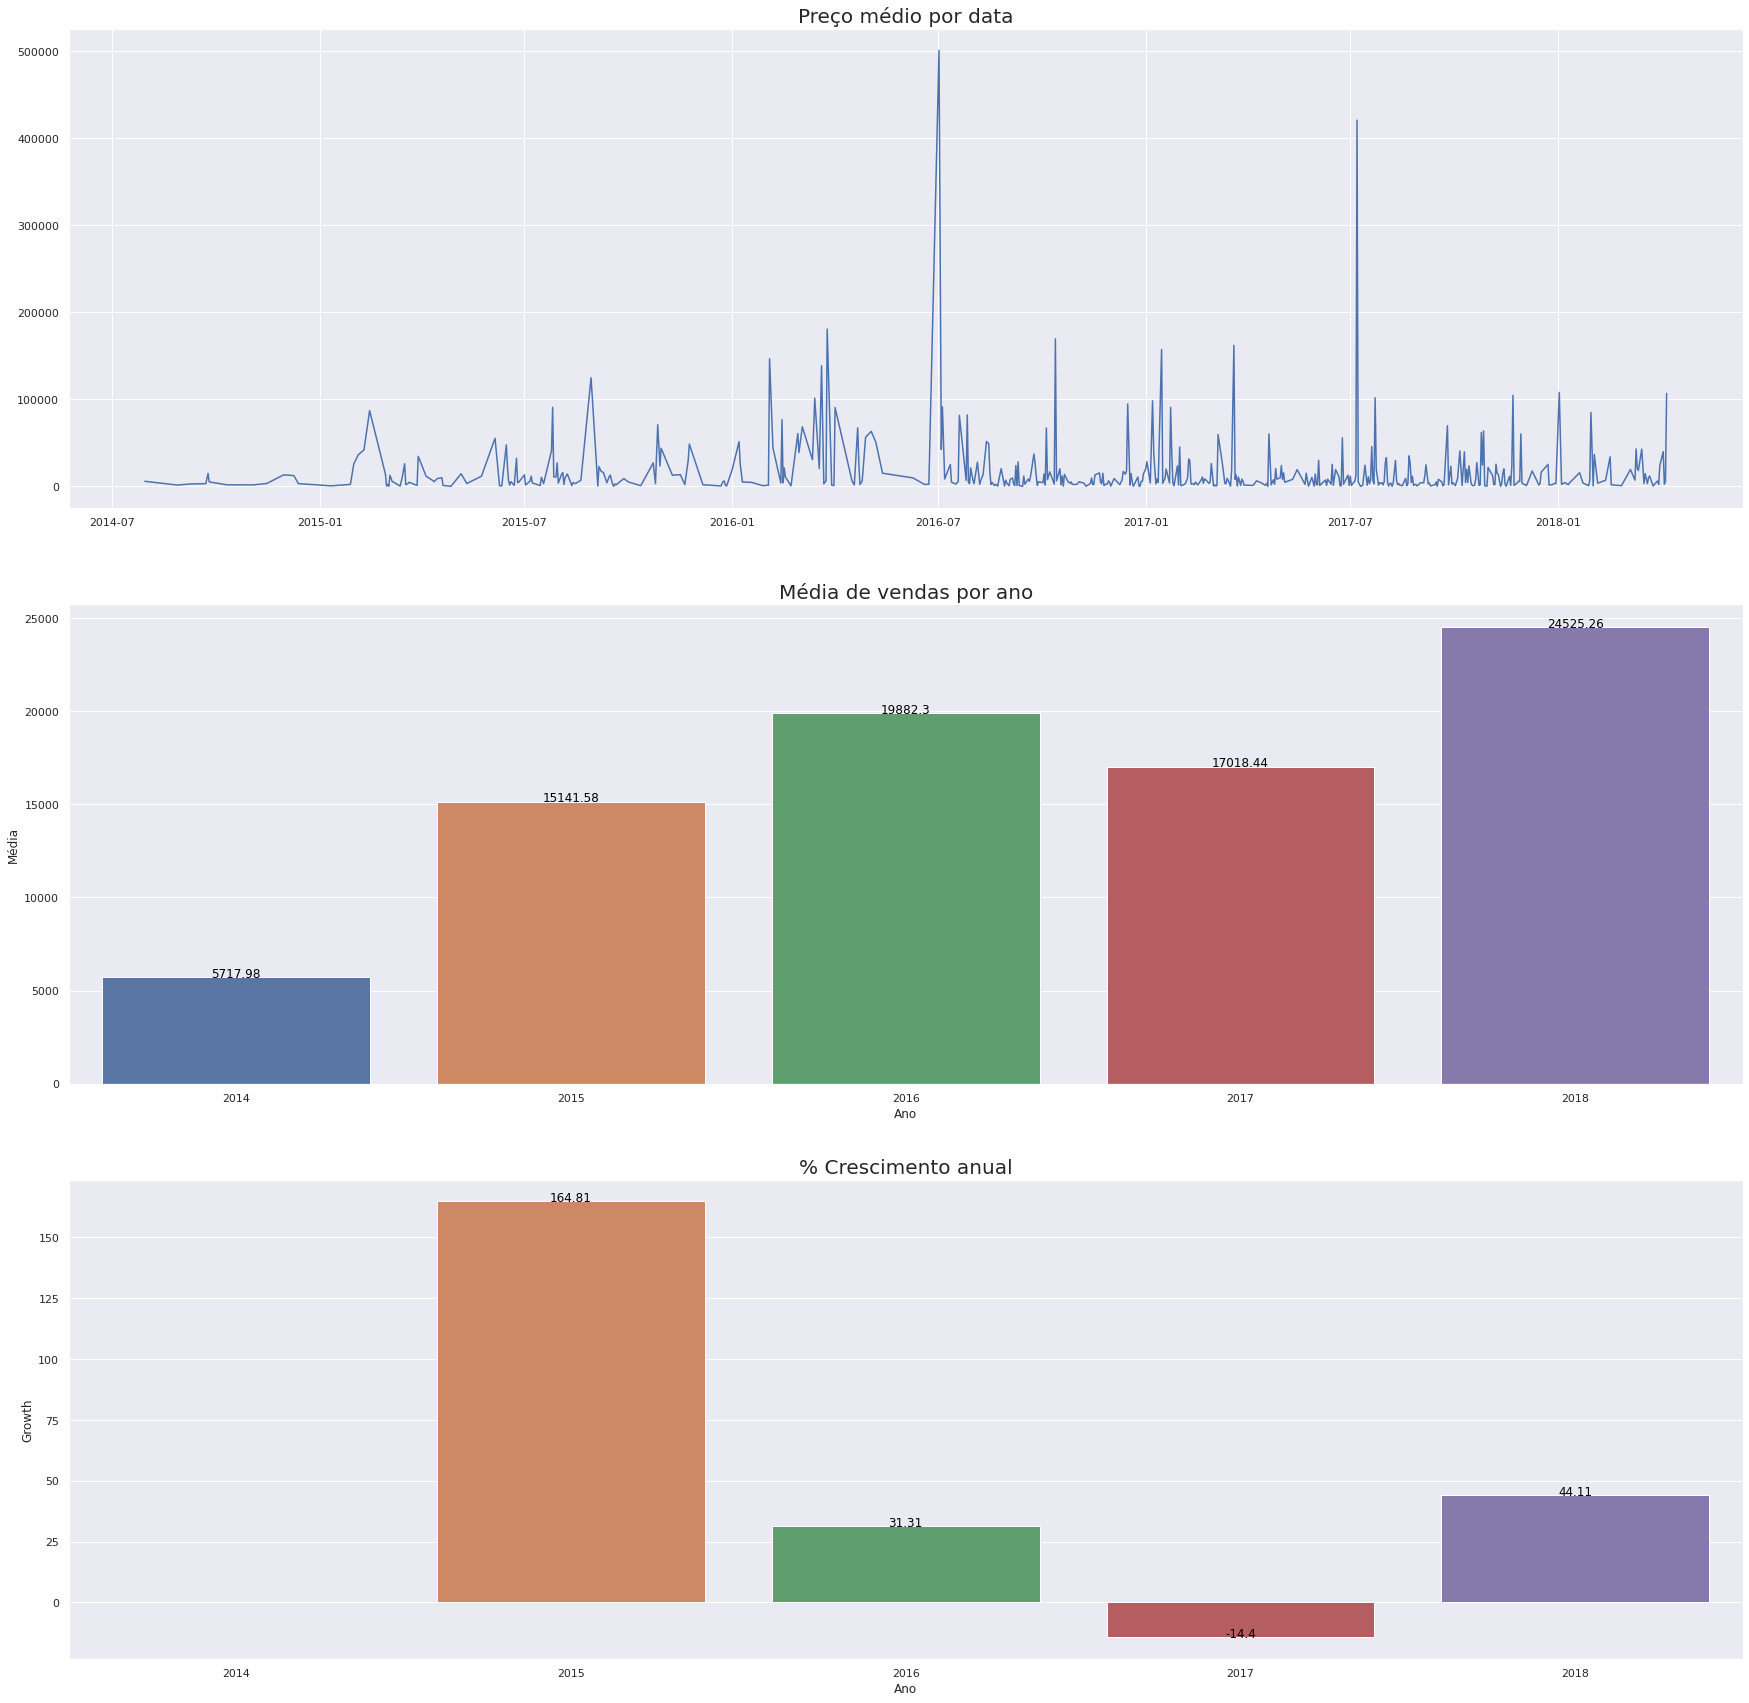

In [ ]:
# Agrupando por cupom e anovenda e data
df3_group = df3[['CupomID','Data','anoVenda','ValorFrete','totalProduto']].groupby(['CupomID','Data','anoVenda','ValorFrete']).sum().reset_index()
#Somando o frete
df3_group['totalProduto'] = (df3_group['totalProduto'] + df3_group['ValorFrete']).astype('float64')

#Agrupa o total por FornecedorPais
aux_data = df3_group[['Data','totalProduto']].groupby('Data').mean().reset_index()
aux1 = df3_group[['anoVenda','totalProduto']].groupby('anoVenda').mean().reset_index()

# % de crescimento
aux1['growth'] = 100 * aux1['totalProduto'].pct_change() 
plt.figure(figsize=(30,30))

plt.subplot(3,1,1)
plt.plot(aux_data['Data'], aux_data['totalProduto']); 
plt.title("Preço médio por data",fontsize=20); 


plt.subplot(3,1,2)
g = sns.barplot(x='anoVenda', y='totalProduto', data=aux1);
plt.title("Média de vendas por ano",fontsize=20);
g.set_xlabel('Ano');
g.set_ylabel('Média'); 
for index, row in aux1.iterrows():
    g.text(row.name,row.totalProduto, round(row.totalProduto,2), color='black', ha="center")

plt.subplot(3,1,3)
g = sns.barplot(x='anoVenda', y='growth', data=aux1);
plt.title("% Crescimento anual",fontsize=20);
g.set_xlabel('Ano');
g.set_ylabel('Growth');
for index, row in aux1.iterrows():
    g.text(row.name,row.growth, round(row.growth,2), color='black', ha="center")

In [ ]:
df3_group[ (df3_group['Data'] >= '2016-07-01') & (df3_group['Data'] <= '2016-07-31') ]
df3[ (df3['Data'] == '2016-07-02') ]

,Data,ClienteID,FuncionarioID,ValorFrete,CupomID,EmpresaFrete,DataEntrega,Cliente,Cidade,Pais,Regiao,CEP,Extensao,NomeFuncionario,Genero,DataAdmissao,Escritorio,Supervisor,Cargo,SalarioAnual,MetaVendas,ProdutoID,Quantidade,Valor,Desconto,Custo,ValorLiquido,CategoriaID,Produto,FornecedorID,Categoria,Departamento,Descricao,Fornecedor,FornecedorPais,diaVenda,mesVenda,anoVenda,diaSemanaVenda,prazoEntrega,totalProduto,estacao
476,2016-07-02,19,3,66.44,10612,One Liners,2016-07-09,Th Fashing,London,UK,Europe,NaN,102.0,Rob Carsson,M,2012-10-01,1,Fletcher G. Mason,Sales Representative,193000,360000.0,60,40,182.80,0.0,148.0680,34.7320,3,Game Over T-Shirt,28,Sportwear,Clothing,Clothing for Active Adults,FrisersAfrong,France,2,7,2016,Saturday,7,1389.2800,inverno
477,2016-07-02,19,3,66.44,10612,One Liners,2016-07-09,Th Fashing,London,UK,Europe,NaN,102.0,Rob Carsson,M,2012-10-01,1,Fletcher G. Mason,Sales Representative,193000,360000.0,10,70,497.00,0.0,402.5700,94.4300,8,Sapporoo Gloves,4,Babywear,Clothing,0-3 Years,Nitsuchiba,Japan,2,7,2016,Saturday,7,6610.1000,inverno
478,2016-07-02,19,3,66.44,10612,One Liners,2016-07-09,Th Fashing,London,UK,Europe,NaN,102.0,Rob Carsson,M,2012-10-01,1,Fletcher G. Mason,Sales Representative,193000,360000.0,36,55,400.95,0.0,324.7695,76.1805,8,Mehmet-Tröja,17,Babywear,Clothing,0-3 Years,ABC,Sweden,2,7,2016,Saturday,7,4189.9275,inverno
479,2016-07-02,19,3,66.44,10612,One Liners,2016-07-09,Th Fashing,London,UK,Europe,NaN,102.0,Rob Carsson,M,2012-10-01,1,Fletcher G. Mason,Sales Representative,193000,360000.0,49,18,324.00,0.0,262.4400,61.5600,3,Finnish Sport Blades,23,Sportwear,Clothing,Clothing for Active Adults,Nordik Koskenkorva,Finland,2,7,2016,Saturday,7,1108.0800,inverno
480,2016-07-02,19,3,66.44,10612,One Liners,2016-07-09,Th Fashing,London,UK,Europe,NaN,102.0,Rob Carsson,M,2012-10-01,1,Fletcher G. Mason,Sales Representative,193000,360000.0,76,80,32075.20,0.0,25980.9120,6094.2880,2,Minnki Pälsii,23,Womens wear,Clothing,Fashion for Women,Nordik Koskenkorva,Finland,2,7,2016,Saturday,7,487543.0400,inverno


In [ ]:
df3_group[ (df3_group['Data'] >= '2017-07-01') & (df3_group['Data'] <= '2017-07-31') ]
df3[ (df3['Data'] == '2017-07-07') ]

,Data,ClienteID,FuncionarioID,ValorFrete,CupomID,EmpresaFrete,DataEntrega,Cliente,Cidade,Pais,Regiao,CEP,Extensao,NomeFuncionario,Genero,DataAdmissao,Escritorio,Supervisor,Cargo,SalarioAnual,MetaVendas,ProdutoID,Quantidade,Valor,Desconto,Custo,ValorLiquido,CategoriaID,Produto,FornecedorID,Categoria,Departamento,Descricao,Fornecedor,FornecedorPais,diaVenda,mesVenda,anoVenda,diaSemanaVenda,prazoEntrega,totalProduto,estacao
36,2017-07-07,80,11,55.53,10993,Freight Express,2017-07-08,Don Balón,Mexico City,Mexico,North America,5033.0,501.0,Rock Rollman,M,2012-10-01,5,Fletcher G. Mason,Sales Representative,135000,300000.0,41,35,442.75,88.5500,312.4044,130.3456,8,Duck Shirt,19,Babywear,Clothing,0-3 Years,Mayflower,USA,7,7,2017,Friday,1,4.473546e+03,inverno
37,2017-07-07,80,11,55.53,10993,Freight Express,2017-07-08,Don Balón,Mexico City,Mexico,North America,5033.0,501.0,Rock Rollman,M,2012-10-01,5,Fletcher G. Mason,Sales Representative,135000,300000.0,29,50,7867.50,1573.5000,5551.3080,2316.1920,6,Davenport,12,Mens Footwear,Shoes,Men Shoes,Austerlich,Germany,7,7,2017,Friday,1,1.142361e+05,inverno
1470,2017-07-07,1,68,30.90,10990,One Liners,2017-07-10,Eintrach GS,Berlin,Germany,Europe,12209.0,202.0,Leif Shine,M,2012-03-05,2,Dorian X. Banks,Sales Coordinator,165000,320000.0,21,65,675.35,0.0000,595.6587,79.6913,3,Basket Shoes,8,Sportwear,Clothing,Clothing for Active Adults,Hot Pants,UK,7,7,2017,Friday,3,5.179935e+03,inverno
1471,2017-07-07,1,68,30.90,10990,One Liners,2017-07-10,Eintrach GS,Berlin,Germany,Europe,12209.0,202.0,Leif Shine,M,2012-03-05,2,Dorian X. Banks,Sales Coordinator,165000,320000.0,34,60,516.81,67.4100,396.3708,120.4392,4,Baywatch Bikkini,16,Bath Clothes,Clothing,Beachwear,Smooth Clothes,USA,7,7,2017,Friday,3,7.158942e+03,inverno
1472,2017-07-07,1,68,30.90,10990,One Liners,2017-07-10,Eintrach GS,Berlin,Germany,Europe,12209.0,202.0,Leif Shine,M,2012-03-05,2,Dorian X. Banks,Sales Coordinator,165000,320000.0,55,65,2942.91,383.8575,2257.0821,685.8254,3,Feiss Fleece Trousers,25,Sportwear,Clothing,Clothing for Active Adults,Mountain International,Canada,7,7,2017,Friday,3,4.419479e+04,inverno
1473,2017-07-07,1,68,30.90,10990,One Liners,2017-07-10,Eintrach GS,Berlin,Germany,Europe,12209.0,202.0,Leif Shine,M,2012-03-05,2,Dorian X. Banks,Sales Coordinator,165000,320000.0,61,66,2132.03,278.0910,1635.1751,496.8559,3,Adihash Running Shoe,29,Sportwear,Clothing,Clothing for Active Adults,Fast Runners,Canada,7,7,2017,Friday,3,3.251440e+04,inverno
1589,2017-07-07,63,68,63.32,10991,One Liners,2017-07-11,Grunewald,Dresden,Germany,Europe,1307.0,202.0,Leif Shine,M,2012-03-05,2,Dorian X. Banks,Sales Coordinator,165000,320000.0,2,50,1084.80,180.8000,797.3280,287.4720,1,Mr X Trousers,1,Mens Clothes,Clothing,Fashion for Men,Sunny Clothes,UK,7,7,2017,Friday,4,1.419280e+04,inverno
1590,2017-07-07,63,68,63.32,10991,One Liners,2017-07-11,Grunewald,Dresden,Germany,Europe,1307.0,202.0,Leif Shine,M,2012-03-05,2,Dorian X. Banks,Sales Coordinator,165000,320000.0,70,20,716.16,119.3600,526.3776,189.7824,1,US-Master Jeans,7,Mens Clothes,Clothing,Fashion for Men,New Balls,Australia,7,7,2017,Friday,4,3.676288e+03,inverno
1591,2017-07-07,63,68,63.32,10991,One Liners,2017-07-11,Grunewald,Dresden,Germany,Europe,1307.0,202.0,Leif Shine,M,2012-03-05,2,Dorian X. Banks,Sales Coordinator,165000,320000.0,76,90,43755.12,7292.5201,32160.0132,11595.1069,2,Minnki Pälsii,23,Womens wear,Clothing,Fashion for Women,Nordik Koskenkorva,Finland,7,7,2017,Friday,4,1.036267e+06,inverno


In [ ]:
df3_group[ (df3_group['Data'] >= '2017-07-01') & (df3_group['Data'] <= '2017-07-31') ]
df3[ (df3['Data'] == '2017-07-23') ]

,Data,ClienteID,FuncionarioID,ValorFrete,CupomID,EmpresaFrete,DataEntrega,Cliente,Cidade,Pais,Regiao,CEP,Extensao,NomeFuncionario,Genero,DataAdmissao,Escritorio,Supervisor,Cargo,SalarioAnual,MetaVendas,ProdutoID,Quantidade,Valor,Desconto,Custo,ValorLiquido,CategoriaID,Produto,FornecedorID,Categoria,Departamento,Descricao,Fornecedor,FornecedorPais,diaVenda,mesVenda,anoVenda,diaSemanaVenda,prazoEntrega,totalProduto,estacao
310,2017-07-23,42,11,28.48,11031,Freight Express,2017-08-01,Millenium,Vancouver,Canada,North America,NaN,501.0,Rock Rollman,M,2012-10-01,5,Fletcher G. Mason,Sales Representative,135000,300000.0,24,21,94.92,0.00,83.7194,11.2006,1,Samba Socker Socks,10,Mens Clothes,Clothing,Fashion for Men,Samba,Brazil,23,7,2017,Sunday,9,235.2126,inverno
311,2017-07-23,42,11,28.48,11031,Freight Express,2017-08-01,Millenium,Vancouver,Canada,North America,NaN,501.0,Rock Rollman,M,2012-10-01,5,Fletcher G. Mason,Sales Representative,135000,300000.0,13,80,2183.20,0.00,1925.5824,257.6176,8,Aino Shoes,6,Babywear,Clothing,0-3 Years,SatSUMAs,Japan,23,7,2017,Sunday,9,20609.4080,inverno
312,2017-07-23,42,11,28.48,11031,Freight Express,2017-08-01,Millenium,Vancouver,Canada,North America,NaN,501.0,Rock Rollman,M,2012-10-01,5,Fletcher G. Mason,Sales Representative,135000,300000.0,1,45,965.25,0.00,851.3505,113.8995,1,Lenin Jeansshorts,1,Mens Clothes,Clothing,Fashion for Men,Sunny Clothes,UK,23,7,2017,Sunday,9,5125.4775,inverno
313,2017-07-23,42,11,28.48,11031,Freight Express,2017-08-01,Millenium,Vancouver,Canada,North America,NaN,501.0,Rock Rollman,M,2012-10-01,5,Fletcher G. Mason,Sales Representative,135000,300000.0,71,16,460.32,0.00,406.0022,54.3178,1,Atles Lussekofta,15,Mens Clothes,Clothing,Fashion for Men,Bar Åkeri,Norway,23,7,2017,Sunday,9,869.0848,inverno
314,2017-07-23,42,11,28.48,11031,Freight Express,2017-08-01,Millenium,Vancouver,Canada,North America,NaN,501.0,Rock Rollman,M,2012-10-01,5,Fletcher G. Mason,Sales Representative,135000,300000.0,64,20,648.00,0.00,628.2958,19.7042,5,WFS shoes,12,Womens Footwear,Shoes,Ladies Shoes,Austerlich,Germany,23,7,2017,Sunday,9,394.0840,inverno
1664,2017-07-23,6,68,55.03,10956,One Liners,2017-07-27,Man Kleider,Mannheim,Germany,Europe,68306.0,202.0,Leif Shine,M,2012-03-05,2,Dorian X. Banks,Sales Coordinator,165000,320000.0,21,12,120.12,0.00,105.9458,14.1742,3,Basket Shoes,8,Sportwear,Clothing,Clothing for Active Adults,Hot Pants,UK,23,7,2017,Sunday,4,170.0904,inverno
1665,2017-07-23,6,68,55.03,10956,One Liners,2017-07-27,Man Kleider,Mannheim,Germany,Europe,68306.0,202.0,Leif Shine,M,2012-03-05,2,Dorian X. Banks,Sales Coordinator,165000,320000.0,47,14,322.56,0.00,284.4979,38.0621,6,Lundenhagen Boots,22,Mens Footwear,Shoes,Men Shoes,Niemegen Boots,Netherlands,23,7,2017,Sunday,4,532.8694,inverno
1666,2017-07-23,6,68,55.03,10956,One Liners,2017-07-27,Man Kleider,Mannheim,Germany,Europe,68306.0,202.0,Leif Shine,M,2012-03-05,2,Dorian X. Banks,Sales Coordinator,165000,320000.0,51,8,785.44,0.00,692.7581,92.6819,6,Snake Boots,24,Mens Footwear,Shoes,Men Shoes,Cangaroo Shoes,Australia,23,7,2017,Sunday,4,741.4552,inverno
1722,2017-07-23,23,56,32.34,11030,Ship for U,2017-07-27,Champes,Lille,France,Europe,59000.0,401.0,Lennart Skoglund,M,2012-01-18,4,Fletcher G. Mason,Sales Representative,121200,150000.0,59,100,980.00,196.00,691.4880,288.5120,3,Rasta WCT,28,Sportwear,Clothing,Clothing for Active Adults,FrisersAfrong,France,23,7,2017,Sunday,4,28655.2000,inverno
1723,2017-07-23,23,56,32.34,11030,Ship for U,2017-07-27,Champes,Lille,France,Europe,59000.0,401.0,Lennart Skoglund,M,2012-01-18,4,Fletcher G. Mason,Sales Representative,121200,150000.0,5,70,424.20,0.00,413.9145,10.2855,1,O-Man Underwear,2,Mens Clothes,Clothing,Fashion for Men,Big L,USA,23,7,2017,Sunday,4,719.9850,inverno


### **A média de vendas é maior no final de semana.**
**Verdadeira: Outro fato é que a média para os dias de domingo é maior que a média para terça,quarta e quinta** 


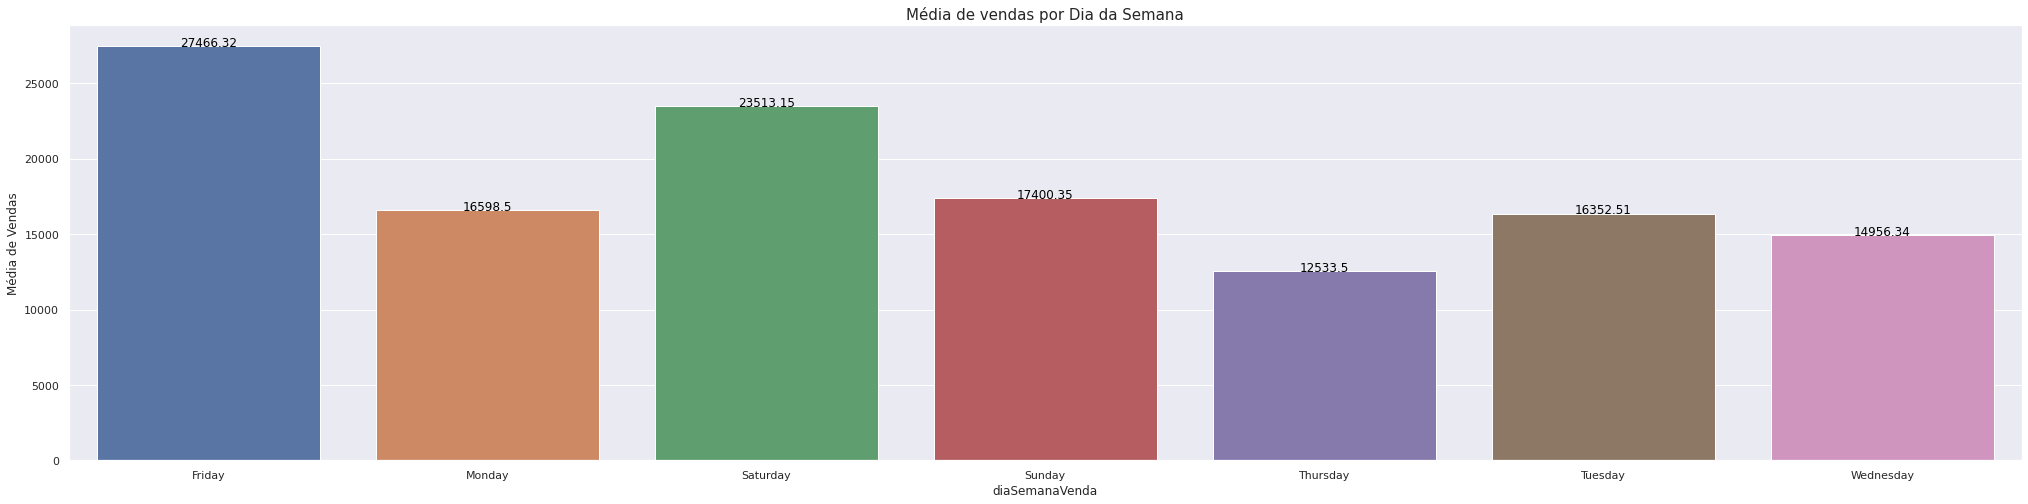

In [ ]:
# Agrupando por cupom e FornecedorPais
df3_group = df3[['diaSemanaVenda','ValorFrete','totalProduto']].groupby(['diaSemanaVenda','ValorFrete']).sum().reset_index()
#Somando o frete
df3_group['totalProduto'] = (df3_group['totalProduto'] + df3_group['ValorFrete']).astype('float64')

#Agrupa o total por FornecedorPais
aux1 = df3_group[['diaSemanaVenda','totalProduto']].groupby('diaSemanaVenda').mean().reset_index()

# % de crescimento
aux1['growth'] = 100 * aux1['totalProduto'].pct_change() 

#tamanho
f = plt.figure(figsize=(35,8))

#Gráfico de barras 
g = sns.barplot(x='diaSemanaVenda', y='totalProduto', data=aux1);
plt.title("Média de vendas por Dia da Semana",fontsize=15);
g.set_xlabel('diaSemanaVenda');
g.set_ylabel('Média de Vendas');
for index, row in aux1.iterrows():
    g.text(row.name,row.totalProduto, round(row.totalProduto,2), color='black', ha="center")



In [ ]:
aux1

,diaSemanaVenda,totalProduto,growth
0,Friday,27466.315014,NaN
1,Monday,16598.498775,-39.567799
2,Saturday,23513.153875,41.658316
3,Sunday,17400.348111,-25.997388
4,Thursday,12533.503088,-27.969814
5,Tuesday,16352.505832,30.470354
6,Wednesday,14956.343610,-8.537910


## 3.3 Análise multivariada

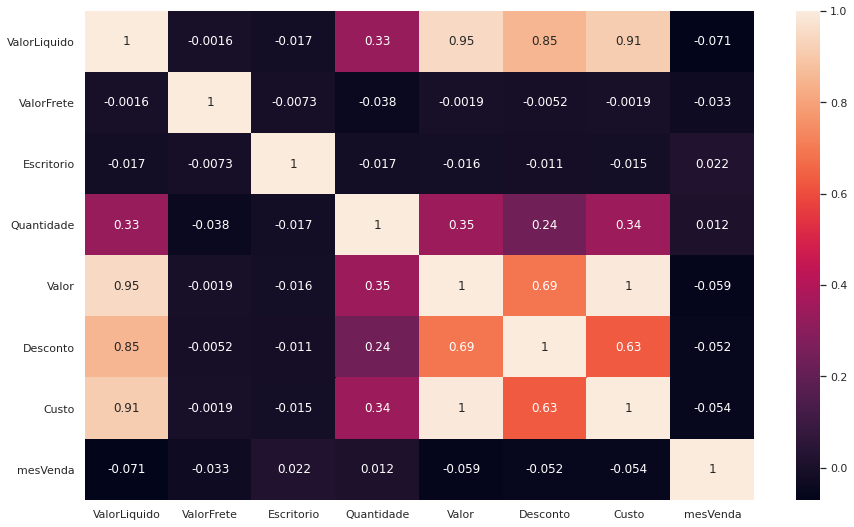

In [ ]:
#Selecionando colunas numéricas
n_attributes = df3[['ValorLiquido','ValorFrete','Escritorio','Quantidade','Valor','Desconto','Custo','mesVenda']]

#tamanho da matriz
f = figsize(15,9) 

#Pearson's Correlation
correlation = n_attributes.corr( method='pearson' )
sns.heatmap( correlation, annot=True );

Existe uma correlação alta entre o valor líquido do produto e seu custo. 

## 3.4 DataSet Final

In [ ]:
df3_dataset = df3.copy()

df3_dataset['ValorFrete'] = df3_dataset['ValorFrete'].apply( lambda x: str(x))
df3_dataset['ValorFrete'] = df3_dataset['ValorFrete'].apply( lambda x: str(x).replace('.', ','))

df3_dataset['Valor'] = df3_dataset['Valor'].apply( lambda x: str(x))
df3_dataset['Valor'] = df3_dataset['Valor'].apply( lambda x: str(x).replace('.', ','))

df3_dataset['Desconto'] = df3_dataset['Desconto'].apply( lambda x: str(x))
df3_dataset['Desconto'] = df3_dataset['Desconto'].apply( lambda x: str(x).replace('.', ','))

df3_dataset['Custo'] = df3_dataset['Custo'].apply( lambda x: str(x))
df3_dataset['Custo'] = df3_dataset['Custo'].apply( lambda x: str(x).replace('.', ','))

df3_dataset['ValorLiquido'] = df3_dataset['ValorLiquido'].apply( lambda x: str(x))
df3_dataset['ValorLiquido'] = df3_dataset['ValorLiquido'].apply( lambda x: str(x).replace('.', ','))

df3_dataset['totalProduto'] = df3_dataset['totalProduto'].apply( lambda x: str(x))
df3_dataset['totalProduto'] = df3_dataset['totalProduto'].apply( lambda x: str(x).replace('.', ','))


df3_dataset.to_csv("dataset_final.csv")

In [ ]:
df3_dataset.head()

,Data,ClienteID,FuncionarioID,ValorFrete,CupomID,EmpresaFrete,DataEntrega,Cliente,Cidade,Pais,Regiao,CEP,Extensao,NomeFuncionario,Genero,DataAdmissao,Escritorio,Supervisor,Cargo,SalarioAnual,MetaVendas,ProdutoID,Quantidade,Valor,Desconto,Custo,ValorLiquido,CategoriaID,Produto,FornecedorID,Categoria,Departamento,Descricao,Fornecedor,FornecedorPais,diaVenda,mesVenda,anoVenda,diaSemanaVenda,prazoEntrega,totalProduto,estacao
0,2018-03-22,78,11,"12,45",11081,Freight Express,2018-04-05,TTT-The Ticky Tie,Butte,USA,North America,59801.0,501.0,Rock Rollman,M,2012-10-01,5,Fletcher G. Mason,Sales Representative,135000,300000.0,75,150,"1163,25","105,75","943,7781","219,4719",1,Bow tie,12,Mens Clothes,Clothing,Fashion for Men,Austerlich,Germany,22,3,2018,Thursday,14,"32815,035",outono
1,2017-07-02,80,11,"20,53",10982,Freight Express,2017-07-04,Don Balón,Mexico City,Mexico,North America,5033.0,501.0,Rock Rollman,M,2012-10-01,5,Fletcher G. Mason,Sales Representative,135000,300000.0,43,9,"102,33","0,0","90,2551","12,0749",4,Summer Shorts,20,Bath Clothes,Clothing,Beachwear,Asin Fashion Ltd Co,Singapore,2,7,2017,Sunday,2,"108,6741",inverno
2,2017-07-02,80,11,"20,53",10982,Freight Express,2017-07-04,Don Balón,Mexico City,Mexico,North America,5033.0,501.0,Rock Rollman,M,2012-10-01,5,Fletcher G. Mason,Sales Representative,135000,300000.0,7,20,"746,4","0,0","698,4566","47,9434",7,Conserve Shoes,3,Childrens wear,Clothing,3-15 Years,Dressed for Succes,USA,2,7,2017,Sunday,2,"958,8679999999999",inverno
3,2015-01-11,80,11,"22,95",10276,Freight Express,2015-01-19,Don Balón,Mexico City,Mexico,North America,5033.0,501.0,Rock Rollman,M,2012-10-01,5,Fletcher G. Mason,Sales Representative,135000,300000.0,10,15,"103,8","0,0","89,6832","14,1168",8,Sapporoo Gloves,4,Babywear,Clothing,0-3 Years,Nitsuchiba,Japan,11,1,2015,Sunday,8,"211,75199999999998",verão
4,2015-01-11,80,11,"22,95",10276,Freight Express,2015-01-19,Don Balón,Mexico City,Mexico,North America,5033.0,501.0,Rock Rollman,M,2012-10-01,5,Fletcher G. Mason,Sales Representative,135000,300000.0,13,10,"274,5","0,0","237,168","37,332",8,Aino Shoes,6,Babywear,Clothing,0-3 Years,SatSUMAs,Japan,11,1,2015,Sunday,8,"373,32",verão


# 4. Solução

In [ ]:
df4 = df3.copy()

## **Do que se trata o negócio por trás dos dados?** 

- Os dados apresentam os registros de vendas de uma rede de lojas. Essa rede de lojas possui escritórios em 5 cidades ( Stockholm, Lund, Paris, Nice, Seattle). 
- Essa rede vende diversos produtos de  vestuário para as regiões da América do Norte, América do Sul e Europa. 
- Seus fornecedores também são de diferentes partes do mundo, inclusive do Japão, mesmo não existindo venda no continente asiático. 
- E também seus clientes (ao todo 90) são diferentes partes do mundo. 

## **A performance de vendas tem melhorado ao longo dos anos?** 

**Vamos observar nos gráficos abaixo que o aumento das vendas foi sim crescente. Mas houve uma queda em 2017(-14% relacionado ao ano de 2016), porém em 2018 o aumento foi de 44%.**

In [ ]:
# Agrupando por cupom e ano da venda 
df4_group = df4[['CupomID','anoVenda','ValorFrete','totalProduto']].groupby(['CupomID','anoVenda','ValorFrete']).sum().reset_index()

#Somando o frete
df4_group['totalProduto'] = (df4_group['totalProduto'] + df4_group['ValorFrete']).astype('float64')

**pct_change:** 
- Mudança percentual entre o elemento atual e um anterior.

- Calcula a variação percentual da linha imediatamente anterior por padrão. Isso é útil para comparar a porcentagem de mudança em uma série de elementos de tempo.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html

posx and posy should be finite values
posx and posy should be finite values


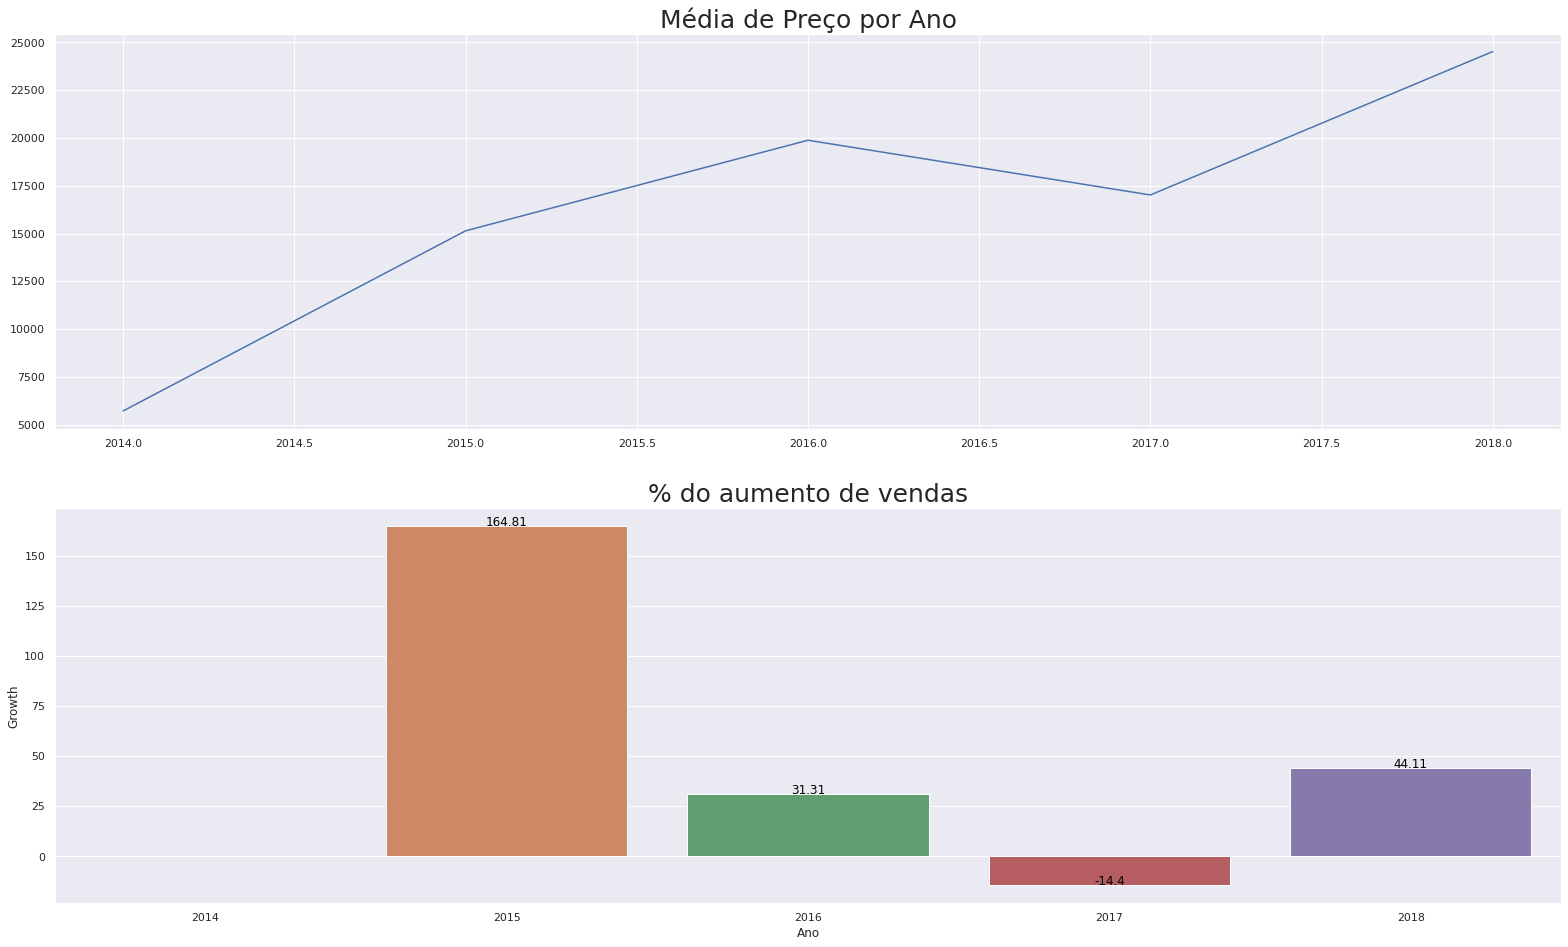

In [ ]:
#Definindo o tamanho da imagem 
plt.figure(figsize=(27,16))

# média de vendas por ano 
aux1 = df4_group[['anoVenda','totalProduto']].groupby('anoVenda').mean().reset_index() 

#Calculando a porcentagem de aumento sobre o ano anterior
aux1['growth'] = 100 * aux1['totalProduto'].pct_change()

plt.subplot(2,1,1)
plt.plot(aux1['anoVenda'], aux1['totalProduto']); 
plt.title("Média de Preço por Ano",fontsize=25);

plt.subplot(2,1,2)
g = sns.barplot(x='anoVenda', y='growth', data=aux1);
plt.title("% do aumento de vendas",fontsize=25);
g.set_xlabel('Ano');
g.set_ylabel('Growth');

for index, row in aux1.iterrows():
    g.text(row.name,row.growth, round(row.growth,2), color='black', ha="center")

plt.show();

## **Existe algum tipo de sazonalidade no ano?**

- A sazonalidade que existe no ano é que a maior concentração de vendas está na Europa. E a principal ategoria vendida pra essa região é a de Sportwear. 

In [ ]:
# Agrupando por cupom e ano da venda 
df4_group = df4[['CupomID','estacao','Regiao','Categoria','anoVenda','mesVenda','ValorFrete','totalProduto']].groupby(['CupomID','estacao','Regiao','Categoria','anoVenda','mesVenda','ValorFrete']).sum().reset_index()

#Somando o frete
df4_group['totalProduto'] = (df4_group['totalProduto'] + df4_group['ValorFrete']).astype('float64')

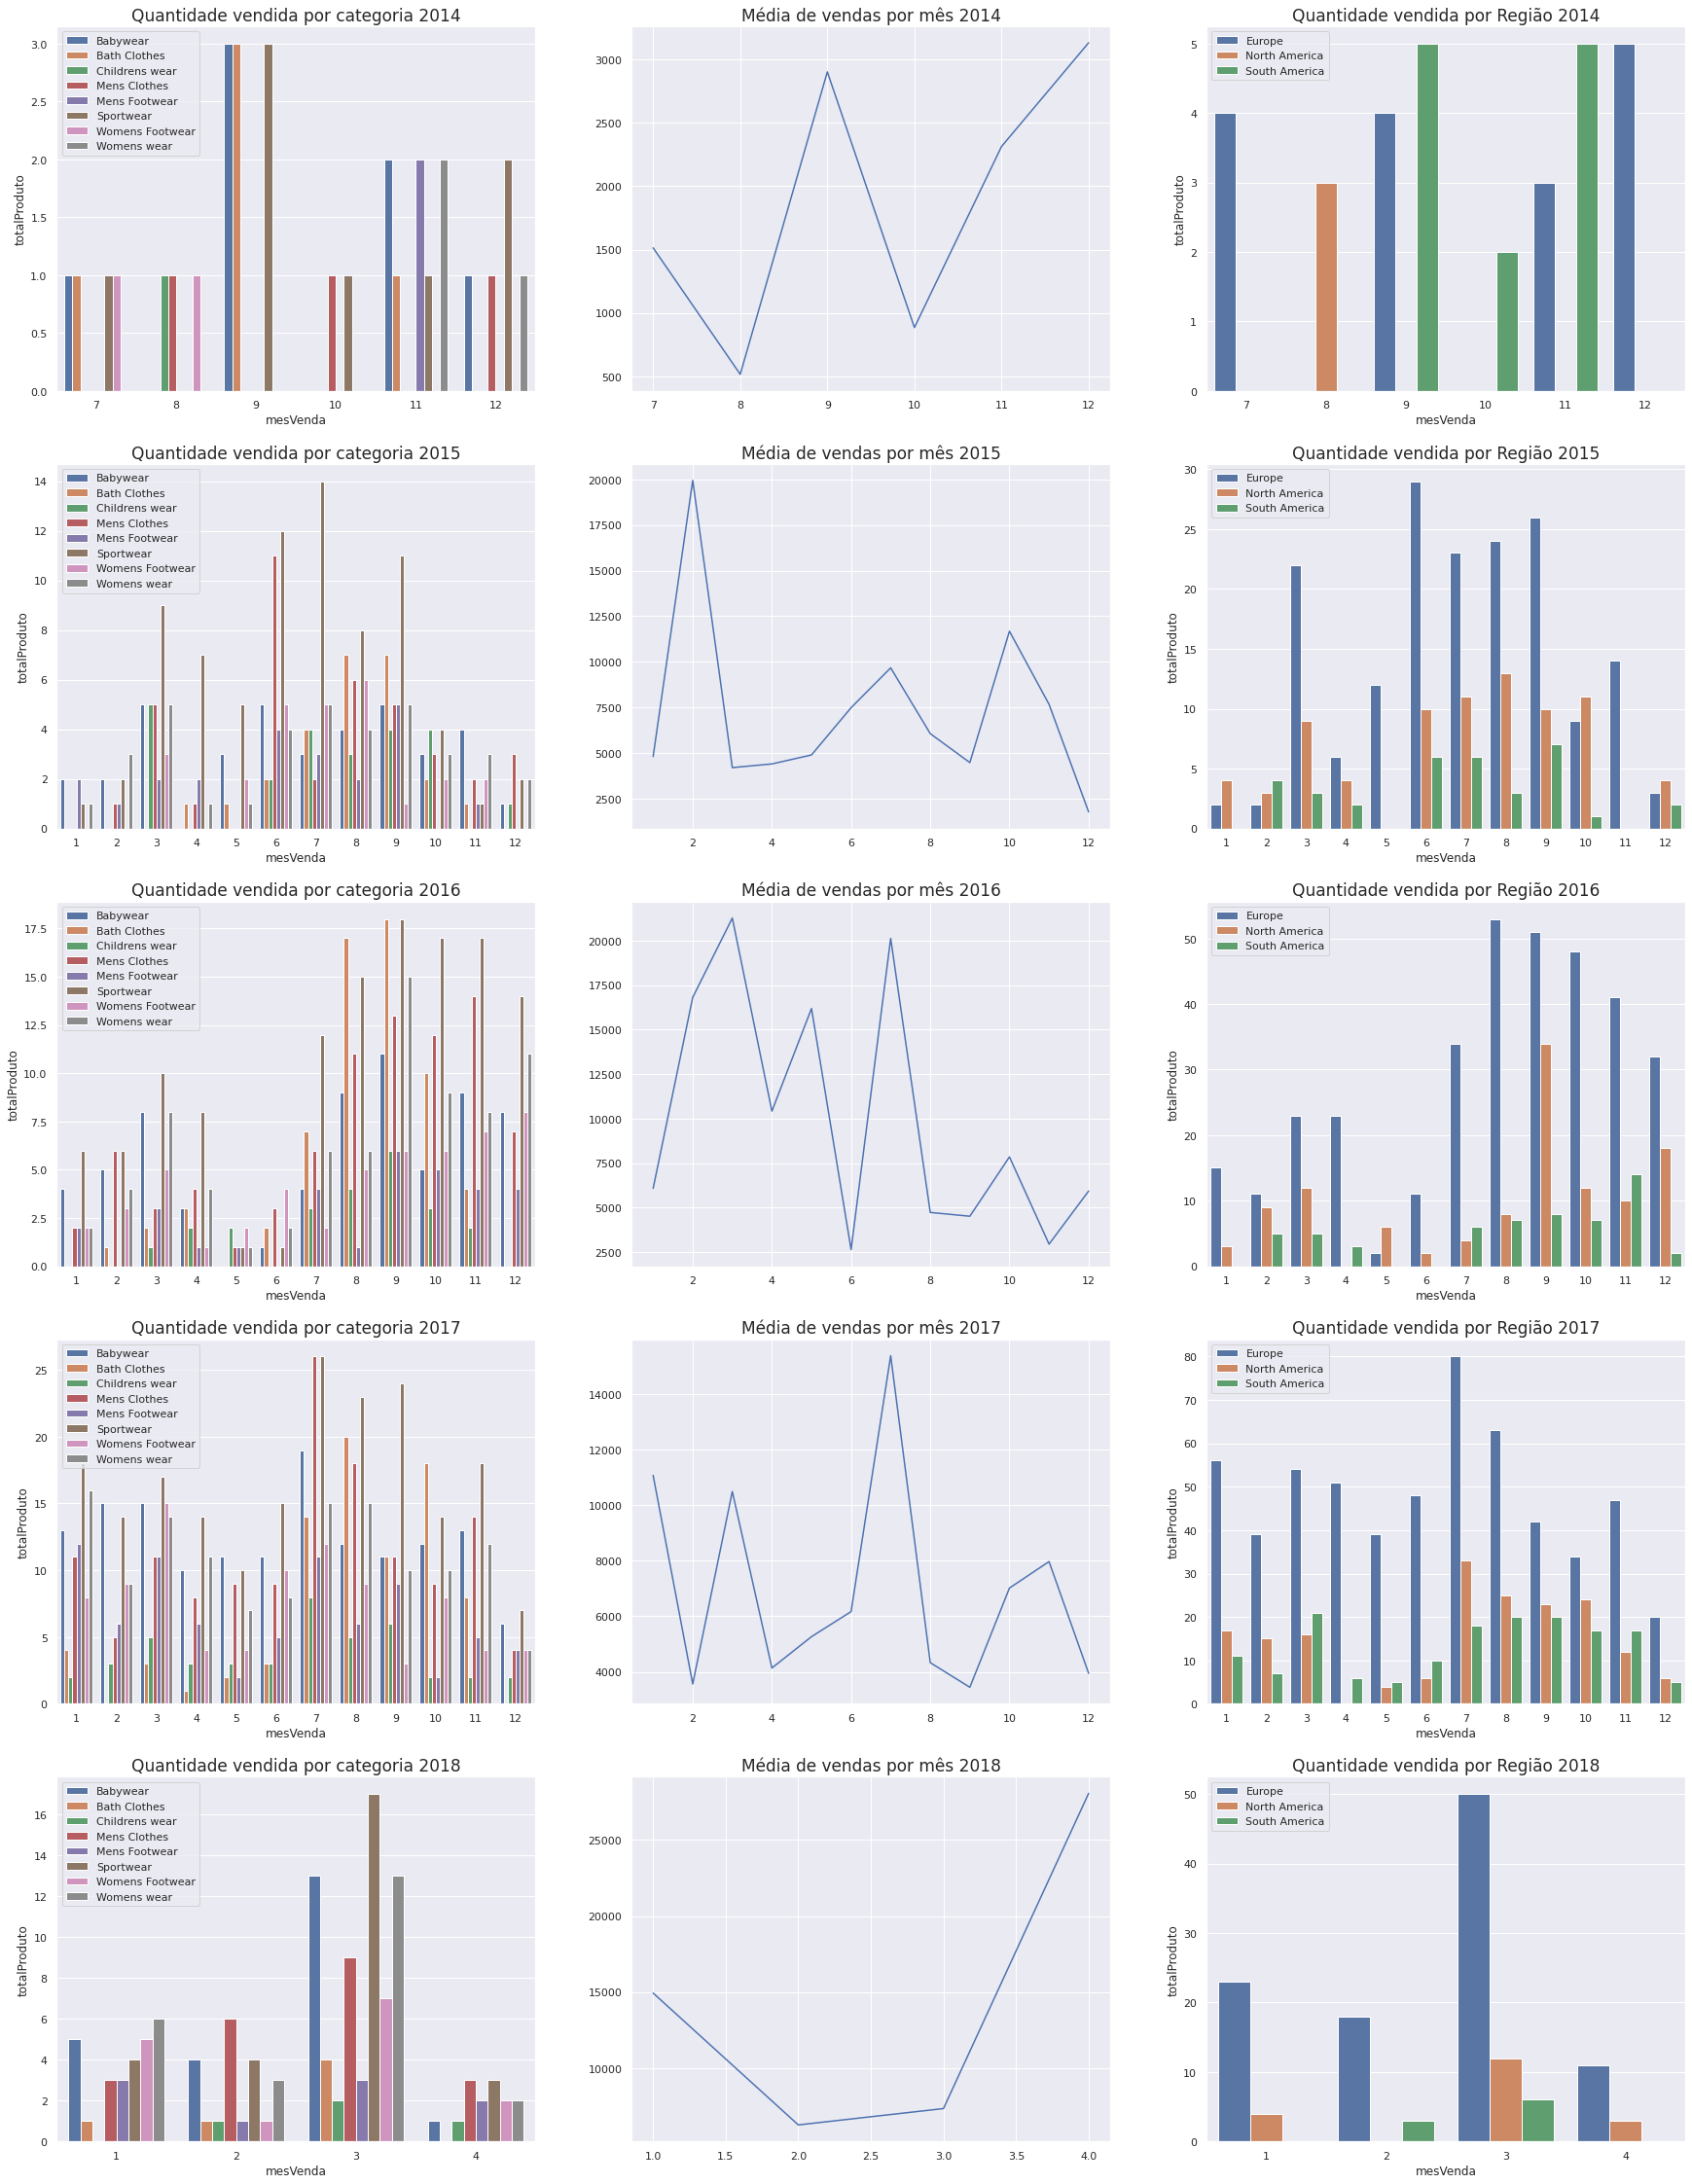

In [ ]:
f = figure(figsize=(30,40))

j=1
for i in df4_group['anoVenda'].sort_values().unique(): 
  plt.subplot(5,3,j)
  aux1 = df4_group[df4_group['anoVenda'] == i]
  aux2 = aux1[['Categoria','mesVenda','totalProduto']].groupby(['Categoria','mesVenda']).count().reset_index()
  g = sns.barplot(x='mesVenda', y='totalProduto', hue='Categoria', hue_order=aux2['Categoria'].unique(), data=aux2); 
  plt.legend(loc='upper left');   
  plt.title("Quantidade vendida por categoria " + str(i),fontsize=17);


  j = j + 1

  
  plt.subplot(5,3,j)
  # média de vendas por ano 
  aux1 = df4_group[df4_group['anoVenda'] == i]
  aux1 = aux1[['mesVenda','totalProduto']].groupby('mesVenda').mean().reset_index() 

  plt.plot(aux1['mesVenda'], aux1['totalProduto']); 
  #plt.title("Média de Preço por Ano",fontsize=25);
  plt.title("Média de vendas por mês " + str(i),fontsize=17);


  j = j + 1

  plt.subplot(5,3,j)
  aux3 = df4_group[df4_group['anoVenda'] == i]
  aux4 = aux3[['Regiao','mesVenda','totalProduto']].groupby(['Regiao','mesVenda']).count().reset_index()
  g = sns.barplot(x='mesVenda', y='totalProduto', hue='Regiao', hue_order=aux4['Regiao'].unique(), data=aux4); 
  plt.legend(loc='upper left');
  plt.title("Quantidade vendida por Região " + str(i),fontsize=17);

  j = j + 1 
  

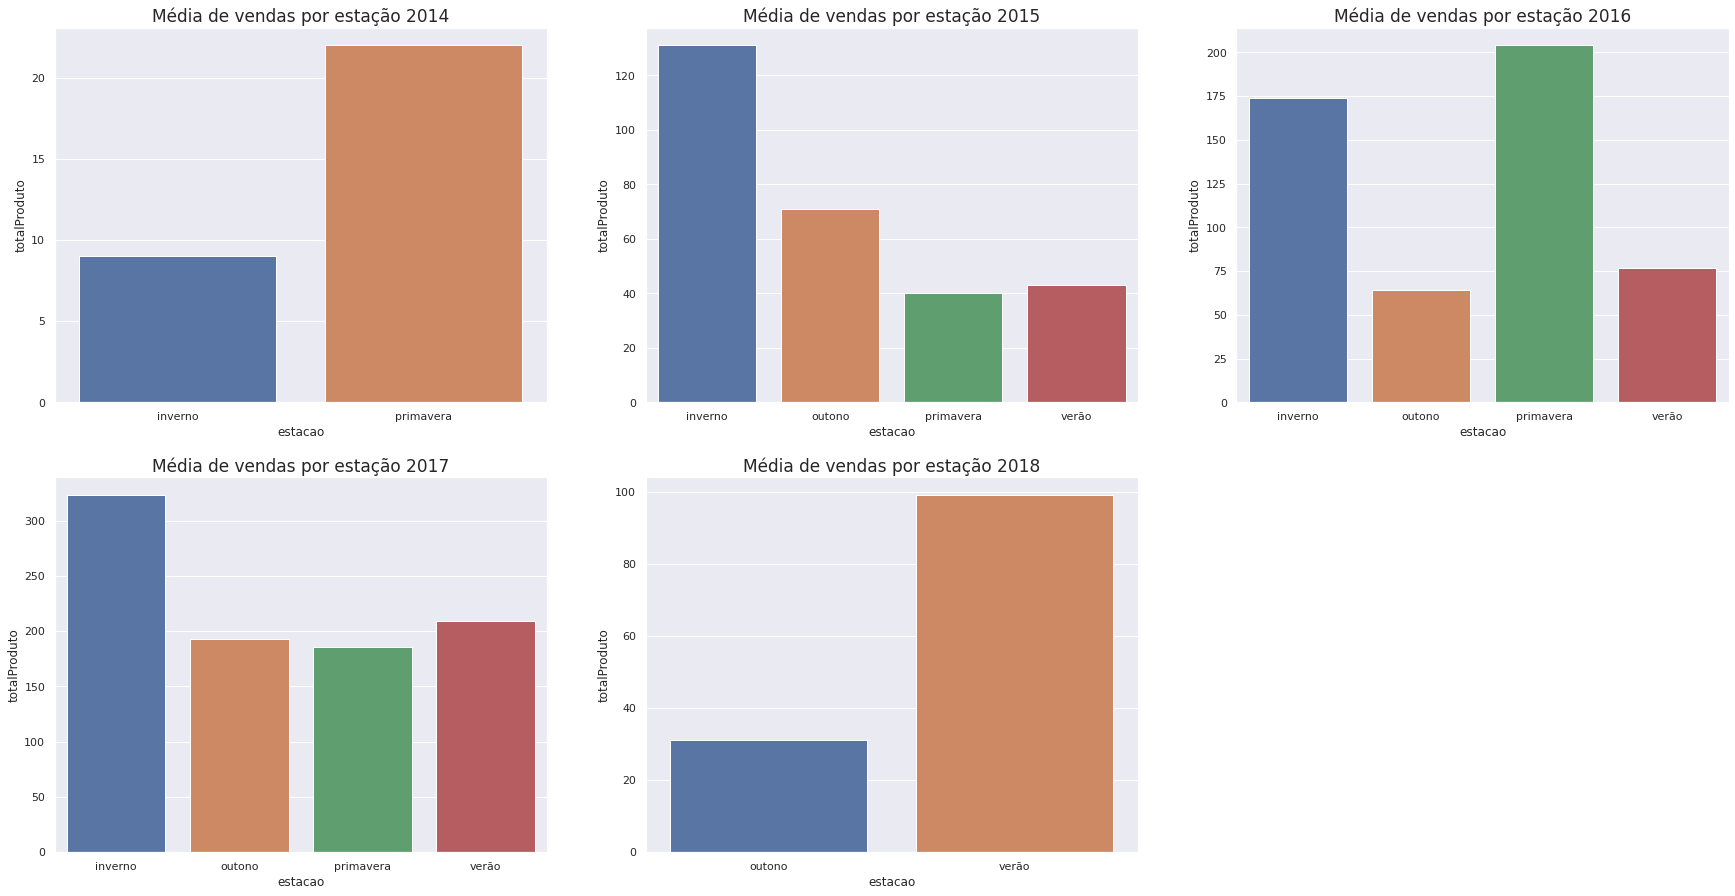

In [ ]:
f = figure(figsize=(30,40))

j=1
for i in df4_group['anoVenda'].sort_values().unique(): 
  plt.subplot(5,3,j)
  aux1 = df4_group[df4_group['anoVenda'] == i]
  aux2 = aux1[['estacao','totalProduto']].groupby(['estacao']).count().reset_index()
  g = sns.barplot(x='estacao', y='totalProduto', data=aux2); 
  #plt.legend(loc='upper left');   
  plt.title("Média de vendas por estação " + str(i),fontsize=17);


  j = j + 1
  

## **Algum cliente tem maior relevância de vendas?** 

- Ao analisar a média de vendas para cada cliente, se destaca o cliente Sunny Ski Store e Grunewald; 
- Porém ao analisar quantas vezes esses clientes compraram, a Sunny Ski fez pouquíssimas compras, ao contrário da Grunewal. Nesse quesito se destaca o cliente Boleros; 
- Por fim o ideal é somar o total de compras realizadas pelos clientes, e então se destaca Grunewald, que tem uma média considerável, realizou diversas compras e no totalizador é o que mais comprou. 

In [ ]:
# Agrupando por cupom e ano da venda 
df4_group = df4[['CupomID','Cliente','ValorFrete','totalProduto']].groupby(['CupomID','Cliente','ValorFrete']).sum().reset_index()

#Somando o frete
df4_group['totalProduto'] = (df4_group['totalProduto'] + df4_group['ValorFrete']).astype('float64')

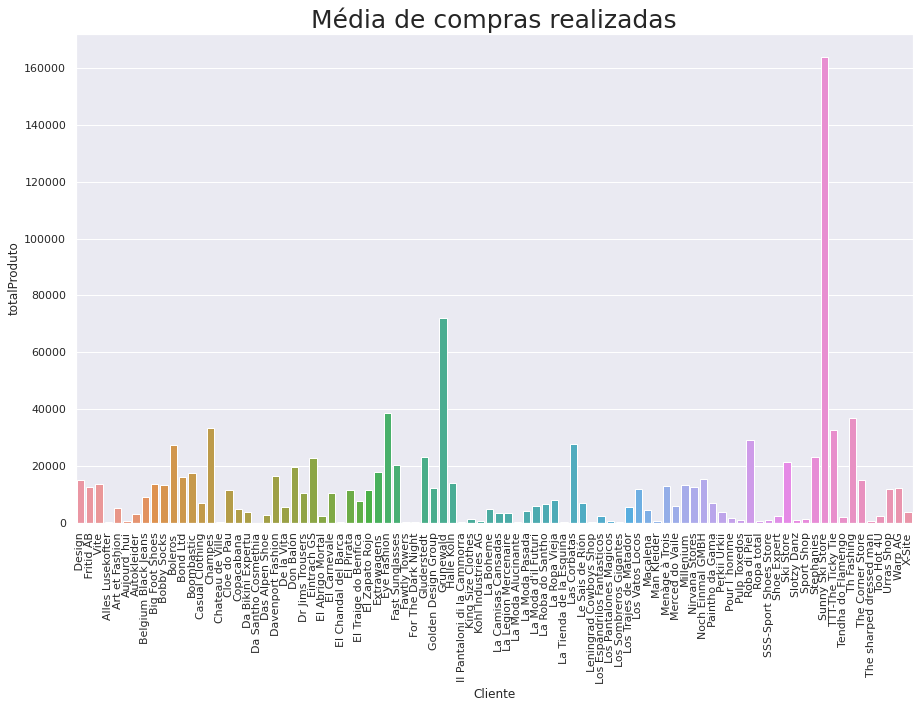

In [ ]:
aux1 = df4_group[['Cliente','totalProduto']].groupby('Cliente').mean().reset_index() 
g = sns.barplot(x='Cliente', y='totalProduto', data=aux1); 
plt.title("Média de compras realizadas",fontsize=25);
plt.xticks(rotation=90);

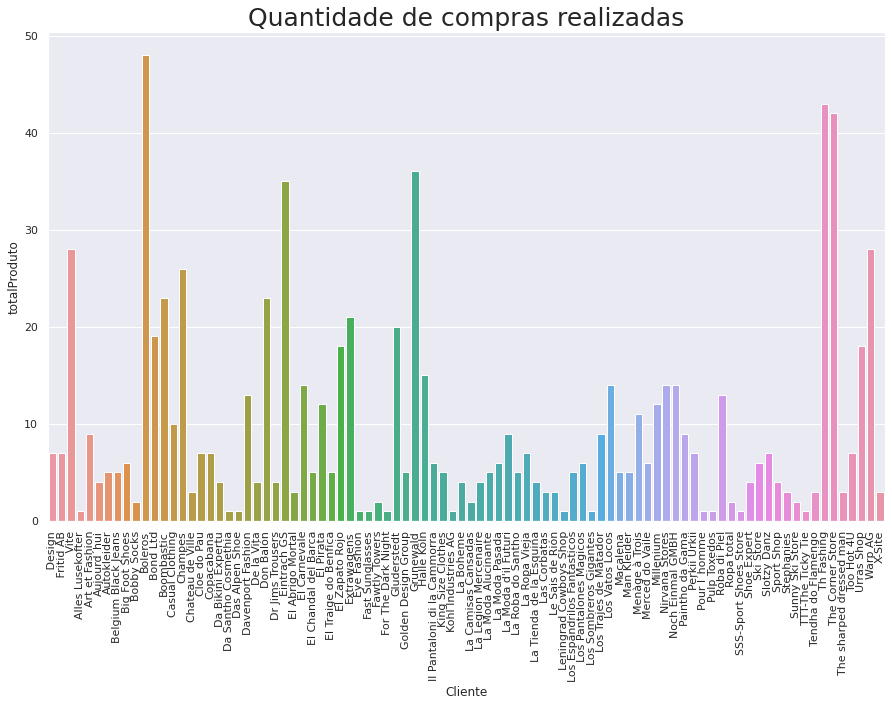

In [ ]:
aux2 = df4_group[['Cliente','totalProduto']].groupby('Cliente').count().reset_index() 
g = sns.barplot(x='Cliente', y='totalProduto', data=aux2); 
plt.title("Quantidade de compras realizadas",fontsize=25);
plt.xticks(rotation=90); 

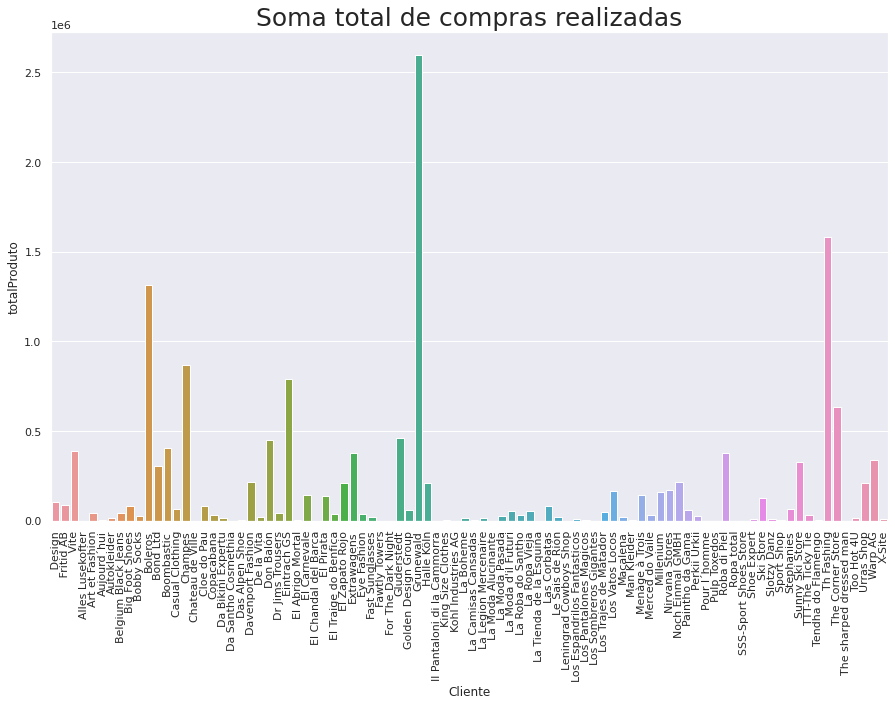

In [ ]:
aux2 = df4_group[['Cliente','totalProduto']].groupby('Cliente').sum().reset_index() 
g = sns.barplot(x='Cliente', y='totalProduto', data=aux2); 
plt.title("Soma total de compras realizadas",fontsize=25);
plt.xticks(rotation=90); 

## **Existe funcionários sem venda? Por que ?** 

- Sim, vários funcionários não possuem vendas pelo fato de seus cargos não serem relacionados a vendas, logo os mesmos também não possuem metas de venda.

In [ ]:
df4['FuncionarioID'].unique()

array([11,  3,  2,  5, 14,  7, 68, 56,  9])

In [ ]:
df4['Cargo'].unique()

array(['Sales Representative', 'Sales Manager', 'Sales Coordinator'],
      dtype=object)

In [ ]:
df_funcionarios[ (df_funcionarios['FuncionarioID'] != 11) & 
                (df_funcionarios['FuncionarioID'] != 3) & 
                (df_funcionarios['FuncionarioID'] != 2) & 
                (df_funcionarios['FuncionarioID'] != 5) & 
                (df_funcionarios['FuncionarioID'] != 14) & 
                (df_funcionarios['FuncionarioID'] != 7) & 
                (df_funcionarios['FuncionarioID'] != 68) &
                (df_funcionarios['FuncionarioID'] != 56) & 
                (df_funcionarios['FuncionarioID'] != 9)]

,FuncionarioID,Extensao,NomeFuncionario,Genero,DataAdmissao,Escritorio,Supervisor,Cargo,SalarioAnual,MetaVendas
9,17,222.0,David Lesterman,M,2011-10-11,2,Xander Z. Miller,Product Manager,75500,NaN
10,20,333.0,John Cleaves,M,2012-10-03,3,Xander Z. Miller,Product Manager,65000,NaN
11,21,444.0,Miro Takako,F,2013-02-22,4,Xander Z. Miller,Product Manager,72000,NaN
12,22,555.0,Binh Protzmann,F,2012-03-06,5,Xander Z. Miller,Product Manager,68000,NaN
13,23,200.0,Cezar Sandu,M,2012-02-23,2,Orli O. Calhoun,Systems Manager,51000,NaN
14,24,200.0,Cindy Crawford,F,2013-06-08,2,Orli O. Calhoun,Systems Manager,50400,NaN
15,25,200.0,James Bond,M,2013-07-06,2,Orli O. Calhoun,Systems Manager,50000,NaN
16,26,200.0,John Doe,M,2014-08-01,2,Orli O. Calhoun,Systems Manager,51600,NaN
17,27,500.0,Mario Kaddafi,M,2012-06-05,5,Orli O. Calhoun,Systems Manager,51300,NaN
18,28,500.0,Paul Dupont,M,2013-02-06,5,Orli O. Calhoun,Systems Manager,51200,NaN


## **Quais categorias de produto vendem mais? Isso é um padrão em todos os países?** 

- As categorias Womens Wear e Mens Footwear são as que possuem maior média de vendas. Porém de acordo com o segundo gráfico, não é correto dizer que esse é o padrão em todos os países.

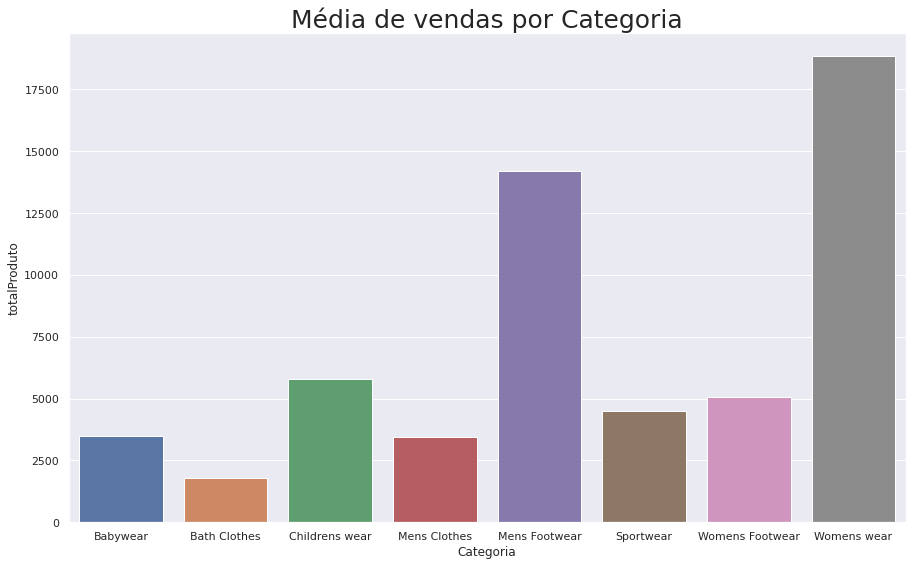

In [ ]:
aux1 = df4[['Categoria','totalProduto']].groupby('Categoria').mean().reset_index()
g = sns.barplot(x='Categoria', y='totalProduto', data=aux1);
plt.title("Média de vendas por Categoria",fontsize=25);

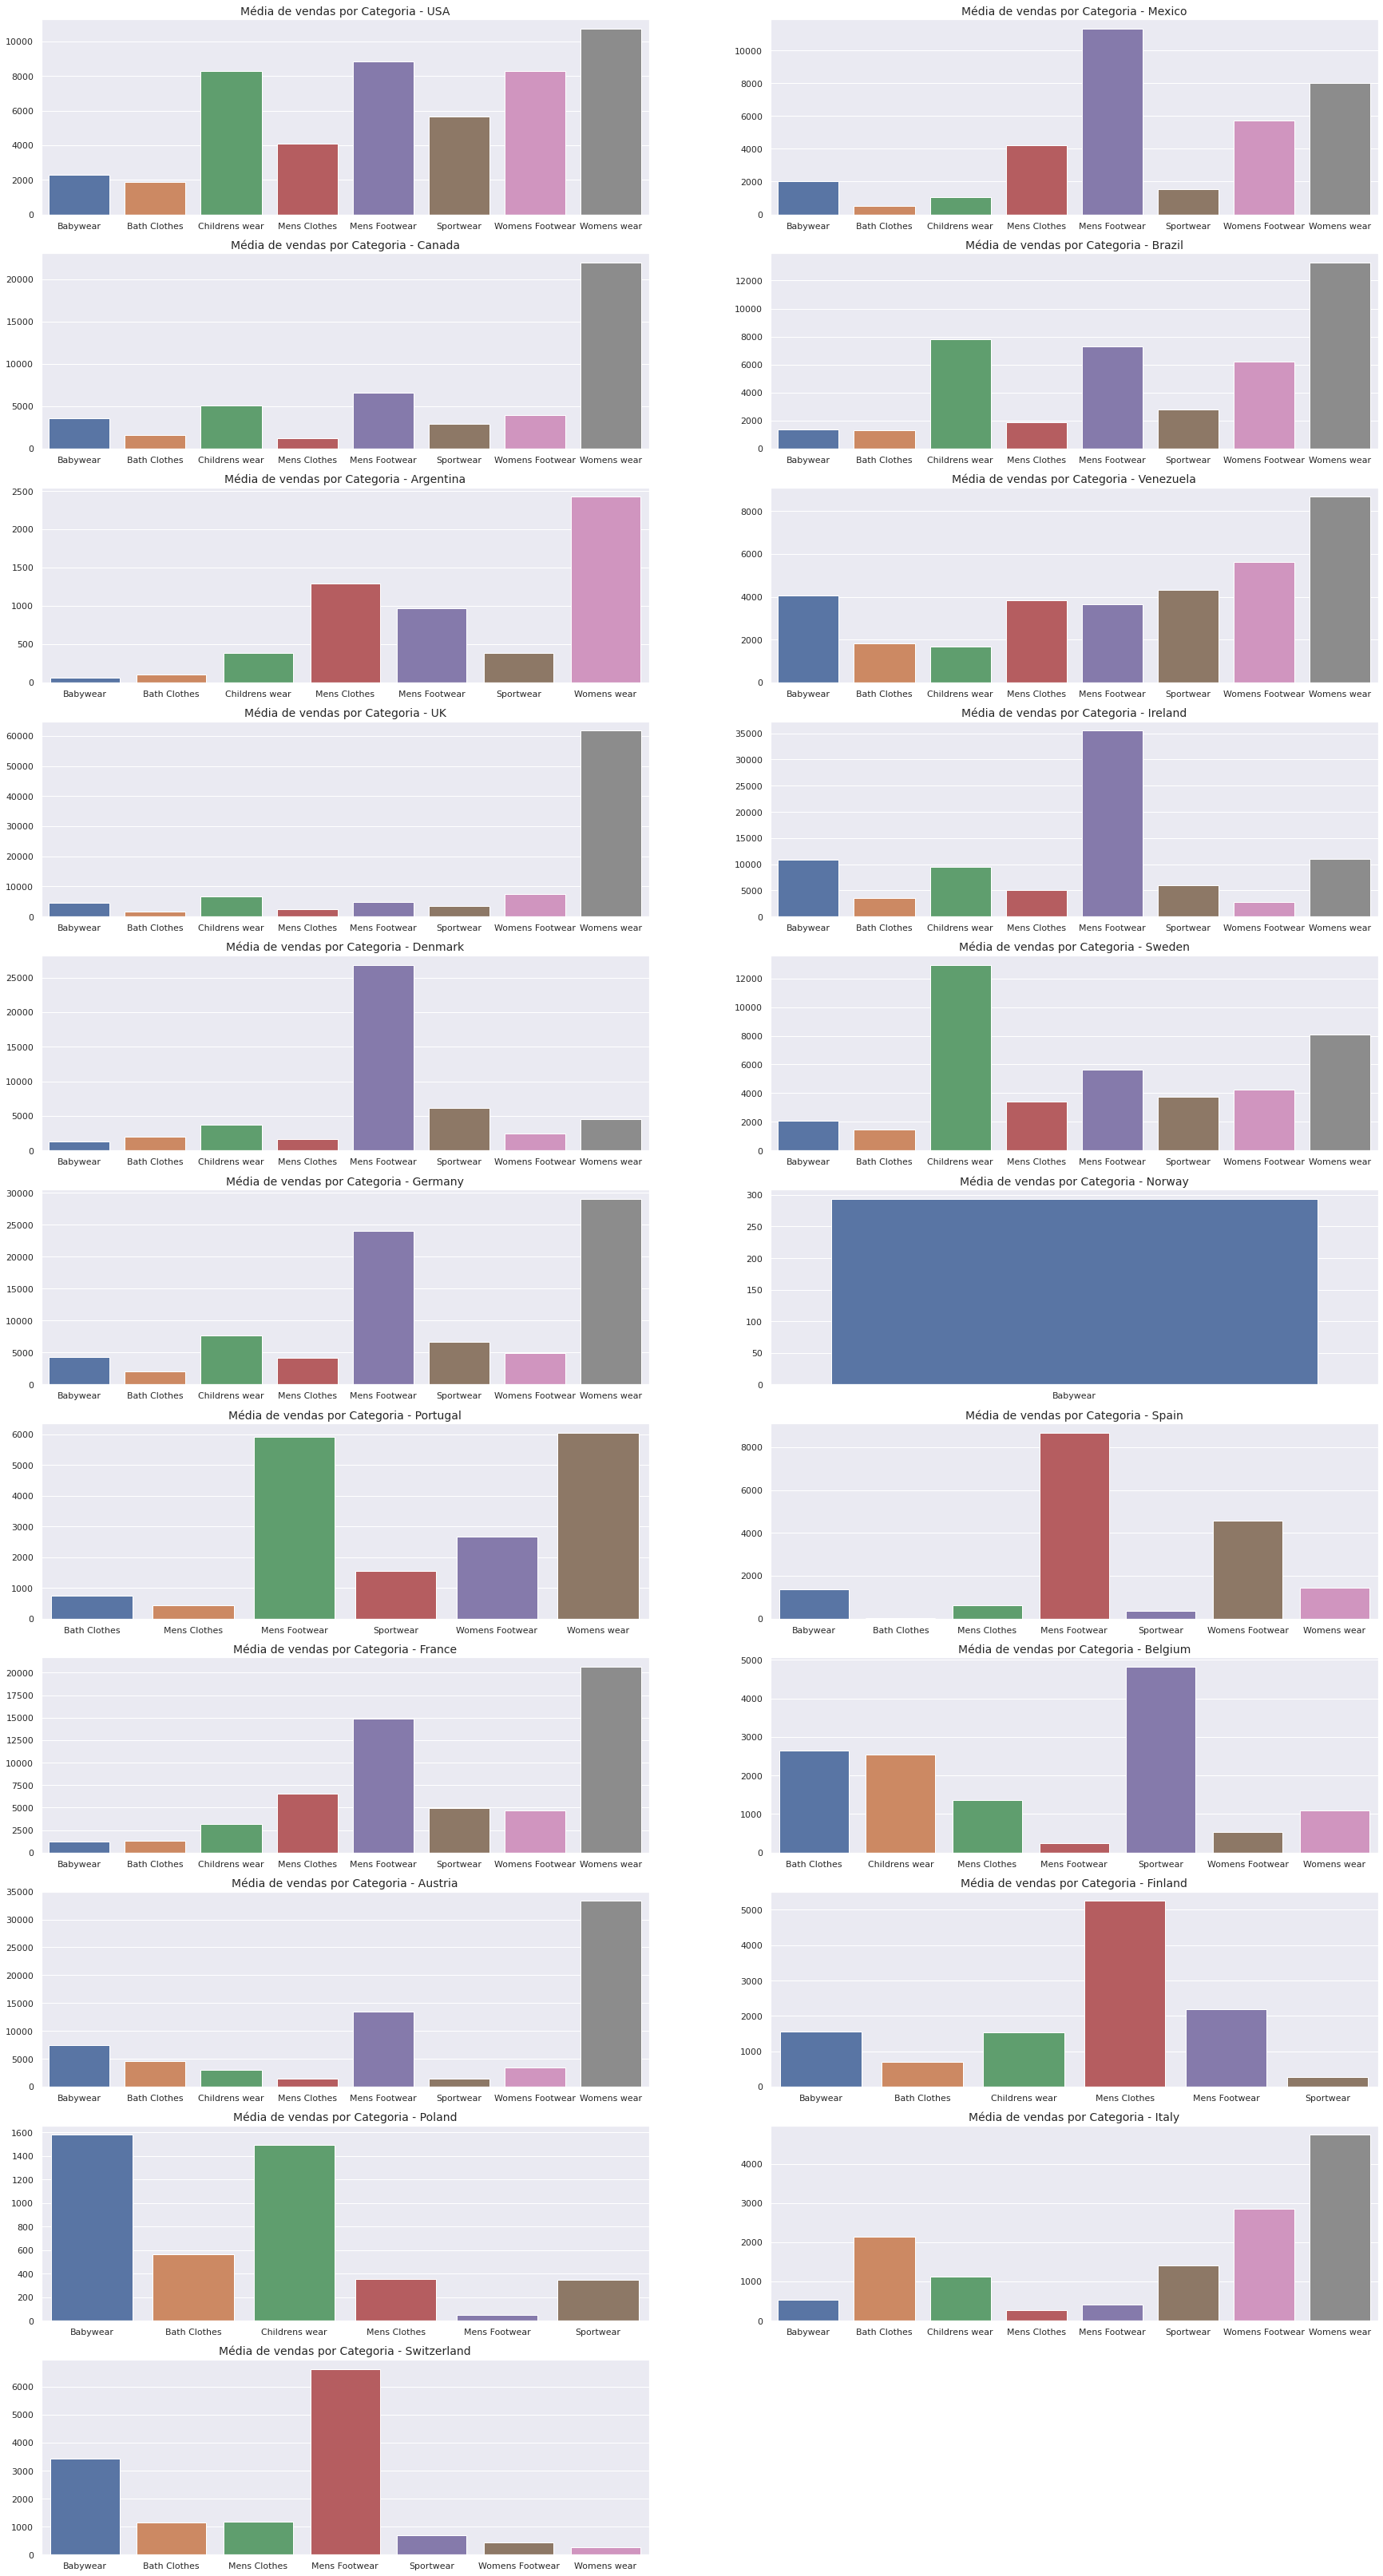

In [ ]:
lista_pais = df4['Pais'].drop_duplicates().tolist()

plt.figure(figsize=(30,80))
for i in range( len(lista_pais) ): 
  plt.subplot(15, 2, i+1) 
  
  aux1 = df4[df4['Pais']==lista_pais[i]] 
  aux2 = aux1[['Categoria','totalProduto']].groupby('Categoria').mean().reset_index() 
  
  g = sns.barplot(x='Categoria', y='totalProduto', data=aux2); 
  plt.title("Média de vendas por Categoria - " + lista_pais[i],fontsize=14); 
  
  g.set_xlabel('')
  g.set_ylabel('');



## **Existe relação entre o preço e o volume de vendas de um produto?** 

- Como se pode observar abaixo nessa matriz de correlação de Pearson, existe sim uma relação forte entre o preço do produto e seu volume de vendas.

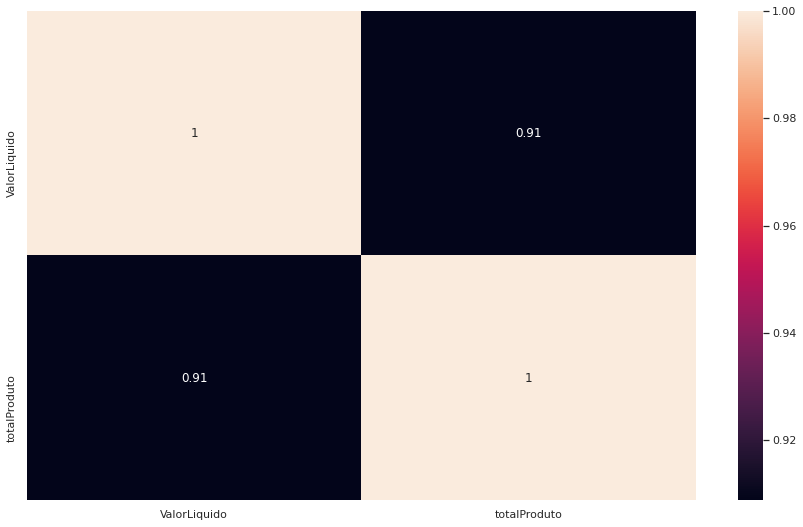

In [ ]:
# Correlação de Pearson
correlation = df4[['ValorLiquido','totalProduto']].corr( method='pearson' )
sns.heatmap( correlation, annot=True );

## **Demais insights** 
Outros insights foram encontrados na Análise Bivariada. São eles: 


**- A média de vendas na Europa é 25% maior.**

- O gráfico mostra que a média de venda na América do Norte comparada com a Europa é 25% menor. Então essa hipótese é VERDADEIRA. 


**- A média de vendas na américa do Sul é 20% maior no Brasil.**
- Falsa: Como mostra o gráfico, a média de vendas no Brasil é 770% maior.


**- Funcionários do escritorio 3 vendem 15% a mais, na média.**
- Falsa: O escritório 3 possui a menor média de vendas


**- A média de vendas aumenta 10% a medida em que a meta aumenta.**
- Falsa: não existe crescimento linear nesse caso, pelo contrário, a maior média de vendas está concentrada em vendedores com meta de 320.000.


**- A média de vendas da categoria Sportwear é 30% maior.**
- Falsa: as categorias que se destacam no quesito de média de vendas são: Childrens wear, Mens Footwear, Womens wear.


**- A média de vendas de produtos dos fornecedores do Reino Unido é 10% maior.**
- Falsa: a média de vendas de produtos dos fornecedores de UK é uma das menores .  


**- A média de vendas do ano 2016 aumentou 20%.**
- Falsa: na verdade a média para esse ano aumento 31% comparado ao ano 2015.


**- A média de vendas é maior no final de semana.**
- Verdadeira: Outro fato é que a média para os dias de domingo é maior que a média para terça,quarta e quinta.
